
<center>
<a href="http://www.insa-toulouse.fr/" ><img src="http://www.math.univ-toulouse.fr/~besse/Wikistat/Images/logo-insa.jpg" style="float:right; max-width: 120px; display: inline" alt="INSA"/></a> 

# <FONT COLOR="Red">Projet de Machine Learning: Gym Members Exercise</font> <a href="https://cran.r-project.org/"><img src="https://cran.r-project.org/Rlogo.svg" style="max-width: 40px; display: inline" alt="R"/></a>

<a href="https://www.cancercenter.com" ><img src= "https://i.chzbgr.com/full/9198216192/hAFAF11FB" style="float:center; max-width: 800px; display: inline"  alt="Gym"/></a>
</center>

# Jeu de données

Les données proviennent du concours KAGGLE et font partie du jeu de données intitulé "Gym Members Exercise Dataset", accessible ici : [Gym Members Exercise Dataset](https://www.kaggle.com/datasets/valakhorasani/gym-members-exercise-dataset).

Ce jeu de données offre un aperçu détaillé des habitudes d'exercice, des caractéristiques physiques et des indicateurs de condition physique des membres d’une salle de sport. Il comprend 15 variables observées chez 973 individus fréquentant une salle de sport :

- **Age** : Âge du membre.
- **Gender** : Sexe du membre (variable qualitative avec deux catégories : homme ou femme).
- **Weight_kg** : Poids en kilogrammes.
- **Height_m** : Taille en mètres.
- **Max_BPM** : Fréquence cardiaque maximale (en battements par minute) atteinte pendant les séances d’entraînement.
- **Avg_BPM** : Fréquence cardiaque moyenne durant les séances d’entraînement.
- **Resting_BPM** : Fréquence cardiaque au repos avant l’entraînement.
- **Session_Duration_hours** : Durée de chaque séance d’entraînement en heures.
- **Calories_Burned** : Nombre total de calories brûlées lors de chaque séance.
- **Workout_Type** : Type d’entraînement pratiqué (variable qualitative avec 4 catégories : cardio, musculation, yoga, HIIT).
- **Fat_Percentage** : Pourcentage de masse grasse du membre.
- **Water_Intake_liters** : Quantité d’eau consommée quotidiennement pendant les séances d’entraînement.
- **Workout_Frequency_days_week** : Nombre de séances d’entraînement hebdomadaires (variable qualitative avec 4 catégories : de 2 à 5 séances).
- **Experience_Level** : Niveau d’expérience (variable qualitative avec 3 niveaux : 1 pour débutant, 3 pour expert).
- **BMI** : Indice de masse corporelle (IMC), calculé à partir du poids et de la taille.

L'objectif de ce projet est d'abord de prédire la variable **Calories_Burned** en fonction des autres variables, puis d'estimer la variable **Experience_Level** en utilisant toutes les autres variables disponibles, y compris **Calories_Burned**.


In [47]:
library(ggplot2)
library(gridExtra)
library(dplyr)
library(corrplot)
library(tidyverse)
library(gridExtra)
library(GGally)
library(plotly)
library(reshape2)
library(FactoMineR) 
library(factoextra)
library(glmnet) 
library(ggfortify)
library(pROC)
library(ROCR)
library(ggcorrplot)
library(ggmosaic)
library(RColorBrewer)
library(MASS)
library(e1071)
library(rpart)
library(rpart.plot)
library(partykit)

Le chargement a nécessité le package : grid

Le chargement a nécessité le package : libcoin

Le chargement a nécessité le package : mvtnorm



# <FONT COLOR="Green">Partie I: Analyse exploratoire des données</font>
L’objectif dans un premier temps est d’explorer les différentes variables, étape préliminaire indispensable à
l’analyse. Ci-dessous sont précisées quelques questions basiques. Vous pouvez compléter l’analyse selon vos
propres idées.
* Commencez par vérifier la nature des différentes variables et leur encodage. N’oubliez pas de convertir
toutes les variables qualitatives.
* Commencez l’exploration par une analyse descriptive unidimensionnelle des données. Des transformations
des variables quantitatives vous semblent-t-elles pertinentes ?
* Poursuivez avec une analyse descriptive bidimensionnelle. Utilisez des techniques de visualisation: par
exemple les nuages de points (scatterplot), des graphes des correlations, des boîtes à moustaches parallèles,
mosaicplot... Quelles variables semblent liées ?
* Réalisez une analyse en composantes principales des variables explicatives quantitatives et interprétez les
résultats. Visualisez les dépendances éventuelles entre les variables à prédire et les variables explicatives.

## <FONT COLOR="Orange">1. Preprocessing</font>

In [3]:
data = read.csv("gym_members_exercise_tracking.csv")

In [4]:
as.data.frame(colSums(is.na(data)))

,colSums(is.na(data))
,<dbl>
Age,0
Gender,0
Weight..kg.,0
Height..m.,0
Max_BPM,0
Avg_BPM,0
Resting_BPM,0
Session_Duration..hours.,0
Calories_Burned,0


Donc, des données contiennent pas des valeurs nulls

In [5]:
summary(data) 

      Age           Gender           Weight..kg.       Height..m.   
 Min.   :18.00   Length:973         Min.   : 40.00   Min.   :1.500  
 1st Qu.:28.00   Class :character   1st Qu.: 58.10   1st Qu.:1.620  
 Median :40.00   Mode  :character   Median : 70.00   Median :1.710  
 Mean   :38.68                      Mean   : 73.85   Mean   :1.723  
 3rd Qu.:49.00                      3rd Qu.: 86.00   3rd Qu.:1.800  
 Max.   :59.00                      Max.   :129.90   Max.   :2.000  
    Max_BPM         Avg_BPM       Resting_BPM    Session_Duration..hours.
 Min.   :160.0   Min.   :120.0   Min.   :50.00   Min.   :0.500           
 1st Qu.:170.0   1st Qu.:131.0   1st Qu.:56.00   1st Qu.:1.040           
 Median :180.0   Median :143.0   Median :62.00   Median :1.260           
 Mean   :179.9   Mean   :143.8   Mean   :62.22   Mean   :1.256           
 3rd Qu.:190.0   3rd Qu.:156.0   3rd Qu.:68.00   3rd Qu.:1.460           
 Max.   :199.0   Max.   :169.0   Max.   :74.00   Max.   :2.000           

Nous observons que:
- **Gender** (Sexe) → *Caractère (qualitative nominale)*
- **Workout_Type** (Type d'entraînement) → *Caractère (qualitative nominale)*
- **Workout_Frequency.days.week.** (Fréquence d'entraînement) → *Qualitative ordinale* (modalités discrètes : 2 à 5 jours)
- **Experience_Level** (Niveau d’expérience) → *Qualitative ordinale* (valeurs : 1 = débutant, 3 = expert)
- **Age** (Âge) → *Quantitative continue*
- **Weight_kg** (Poids) → *Quantitative continue*
- **Height_m** (Taille) → *Quantitative continue*
- **Max_BPM** (Fréquence cardiaque max) → *Quantitative continue*
- **Avg_BPM** (Fréquence cardiaque moyenne) → *Quantitative continue*
- **Resting_BPM** (Fréquence cardiaque au repos) → *Quantitative continue*
- **Session_Duration_hours** (Durée de séance) → *Quantitative continue*
- **Calories_Burned** (Calories brûlées) → *Quantitative continue*
- **Fat_Percentage** (Pourcentage de graisse) → *Quantitative continue*
- **Water_Intake_liters** (Consommation d’eau) → *Quantitative continue*
- **BMI** (Indice de masse corporelle) → *Quantitative continue*

**Cependant, la presentation des variables qualitatives ne sont pas efficases pour les analyser, donc, il faut changer du type des variables qualitatives en facteur**

In [6]:
data[, 'Gender'] <- as.factor(data[, 'Gender'])
data[, 'Workout_Type'] <- as.factor(data[, 'Workout_Type'])
data[, 'Workout_Frequency..days.week.'] <- as.factor(data[, 'Workout_Frequency..days.week.'])
data[, 'Experience_Level'] <- as.factor(data[, 'Experience_Level'])
summary(data)

      Age           Gender     Weight..kg.       Height..m.       Max_BPM     
 Min.   :18.00   Female:462   Min.   : 40.00   Min.   :1.500   Min.   :160.0  
 1st Qu.:28.00   Male  :511   1st Qu.: 58.10   1st Qu.:1.620   1st Qu.:170.0  
 Median :40.00                Median : 70.00   Median :1.710   Median :180.0  
 Mean   :38.68                Mean   : 73.85   Mean   :1.723   Mean   :179.9  
 3rd Qu.:49.00                3rd Qu.: 86.00   3rd Qu.:1.800   3rd Qu.:190.0  
 Max.   :59.00                Max.   :129.90   Max.   :2.000   Max.   :199.0  
    Avg_BPM       Resting_BPM    Session_Duration..hours. Calories_Burned 
 Min.   :120.0   Min.   :50.00   Min.   :0.500            Min.   : 303.0  
 1st Qu.:131.0   1st Qu.:56.00   1st Qu.:1.040            1st Qu.: 720.0  
 Median :143.0   Median :62.00   Median :1.260            Median : 893.0  
 Mean   :143.8   Mean   :62.22   Mean   :1.256            Mean   : 905.4  
 3rd Qu.:156.0   3rd Qu.:68.00   3rd Qu.:1.460            3rd Qu.:1076.0

## <FONT COLOR="Orange">2. Analyse descriptive unidimensionnelle</font>

In [7]:
cat_cols <- c('Gender', 'Workout_Type', 'Workout_Frequency..days.week.', 'Experience_Level')
cat <- data[, cat_cols]
num <- data[, setdiff(names(data), cat_cols)]
num_cols <- colnames(num)

### <FONT COLOR="Blue">2.1. Variables quantitatives</font>

- **Distribution de la variable en classes**

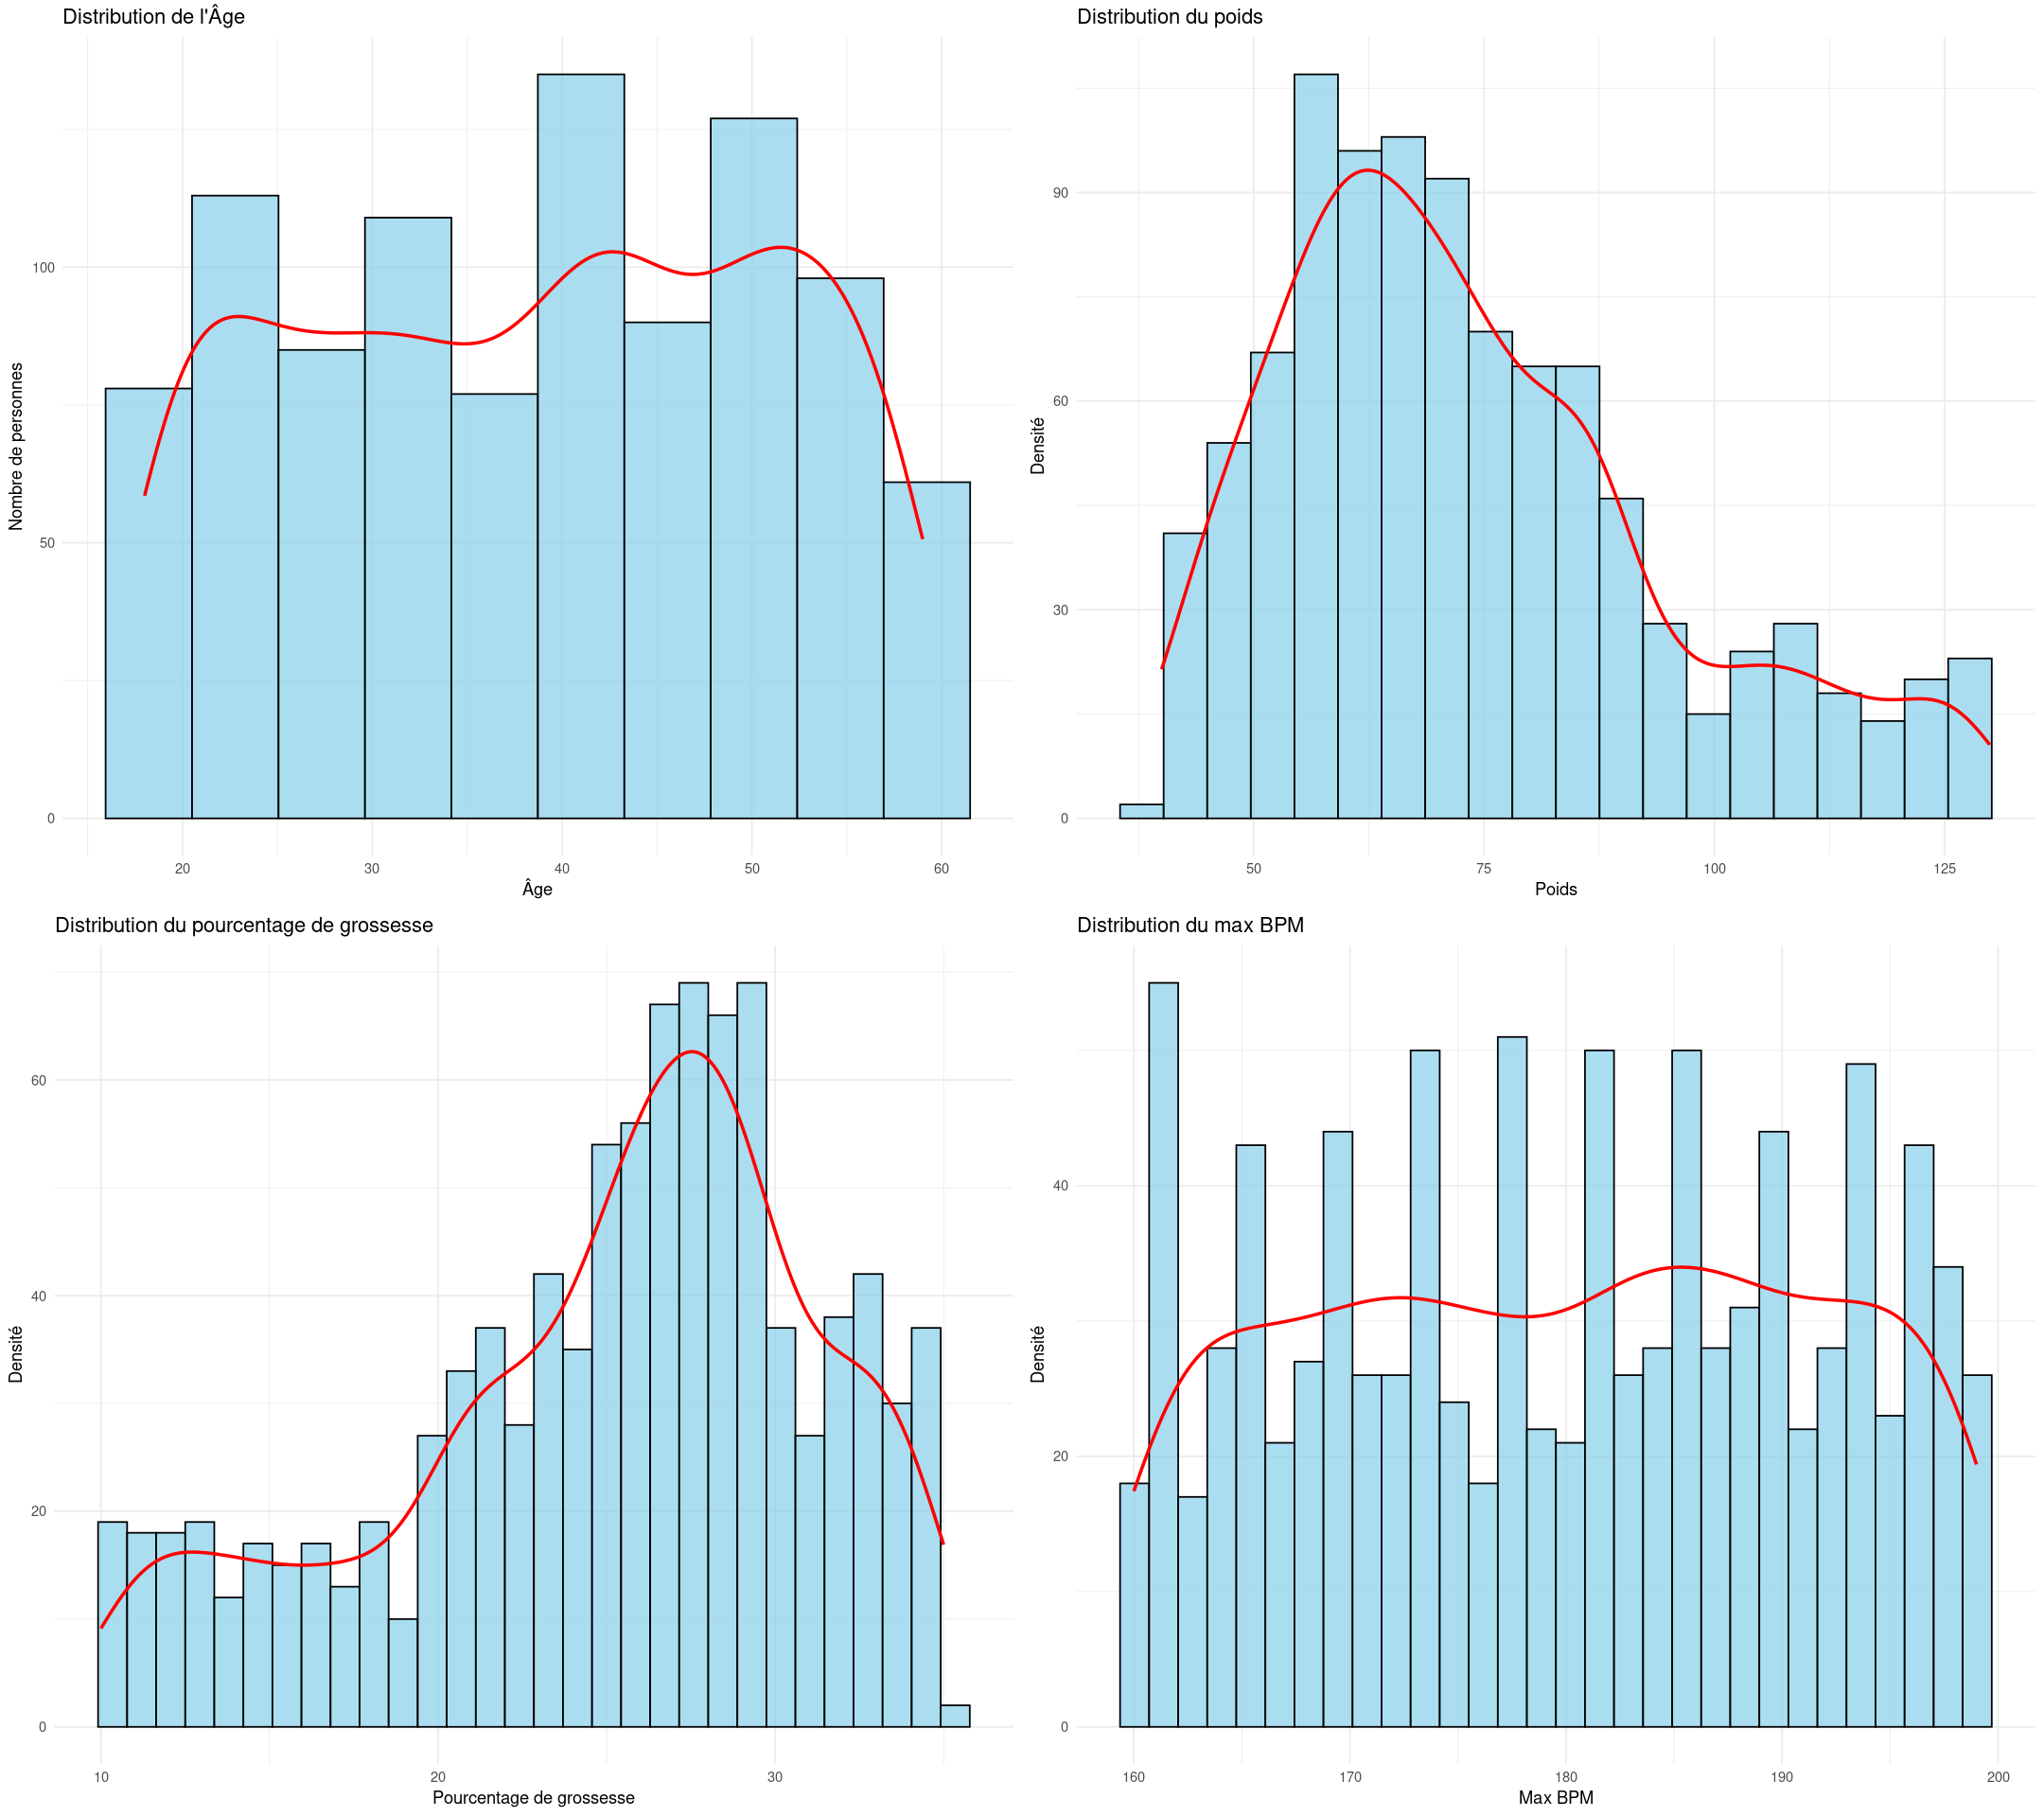

In [8]:
hist_age = ggplot(data, aes(x = Age)) +
  geom_histogram(aes(y = after_stat(count)), bins = 10, fill = "skyblue", color = "black", alpha = 0.7) +   
  geom_density( aes(y = after_stat(density * nrow(data) * (max(data$Age) - min(data$Age)) / 10)), color = "red", linewidth = 1 ) +  
  labs(title = "Distribution de l'Âge", x = "Âge", y = "Nombre de personnes" ) + 
  theme_minimal()  
hist_weight = ggplot(data, aes(x = Weight..kg.)) +
  geom_histogram(aes(y = after_stat(count)), bins = 20, fill = "skyblue", color = "black", alpha = 0.7) +   
  geom_density(aes(y = after_stat(density * nrow(data) * (max(data$Weight..kg.) - min(data$Weight..kg.)) / 20)), color = "red", linewidth = 1) +  
  labs(title = "Distribution du poids", x = "Poids", y = "Densité") +  
  theme_minimal()  
hist_Max_BPM = ggplot(data, aes(x = Max_BPM)) +
  geom_histogram(aes(y = after_stat(count)), bins = 30,  fill = "skyblue", color = "black", alpha = 0.7) +   
  geom_density(aes(y = after_stat(density * nrow(data) * (max(data$Max_BPM) - min(data$Max_BPM)) / 30)), color = "red", linewidth = 1) +  
  labs(title = "Distribution du max BPM", x = "Max BPM", y = "Densité") +  
  theme_minimal()  
hist_fat_p = ggplot(data, aes(x = Fat_Percentage)) +
  geom_histogram(aes(y = after_stat(count)),bins = 30, fill = "skyblue", color = "black", alpha = 0.7) +   
  geom_density(aes(y = after_stat(density * nrow(data) * (max(data$Fat_Percentage) - min(data$Fat_Percentage)) / 30)), color = "red", linewidth = 1) +  
  labs(title = "Distribution du pourcentage de grossesse", x = "Pourcentage de grossesse", y = "Densité") +  
  theme_minimal() 
options(repr.plot.width = 18, repr.plot.height = 16)
grid.arrange(hist_age, hist_weight, hist_fat_p, hist_Max_BPM, 
             ncol = 2, nrow = 2)   


**La médiane, l’étendue interquartile et d’éventuels outliers**

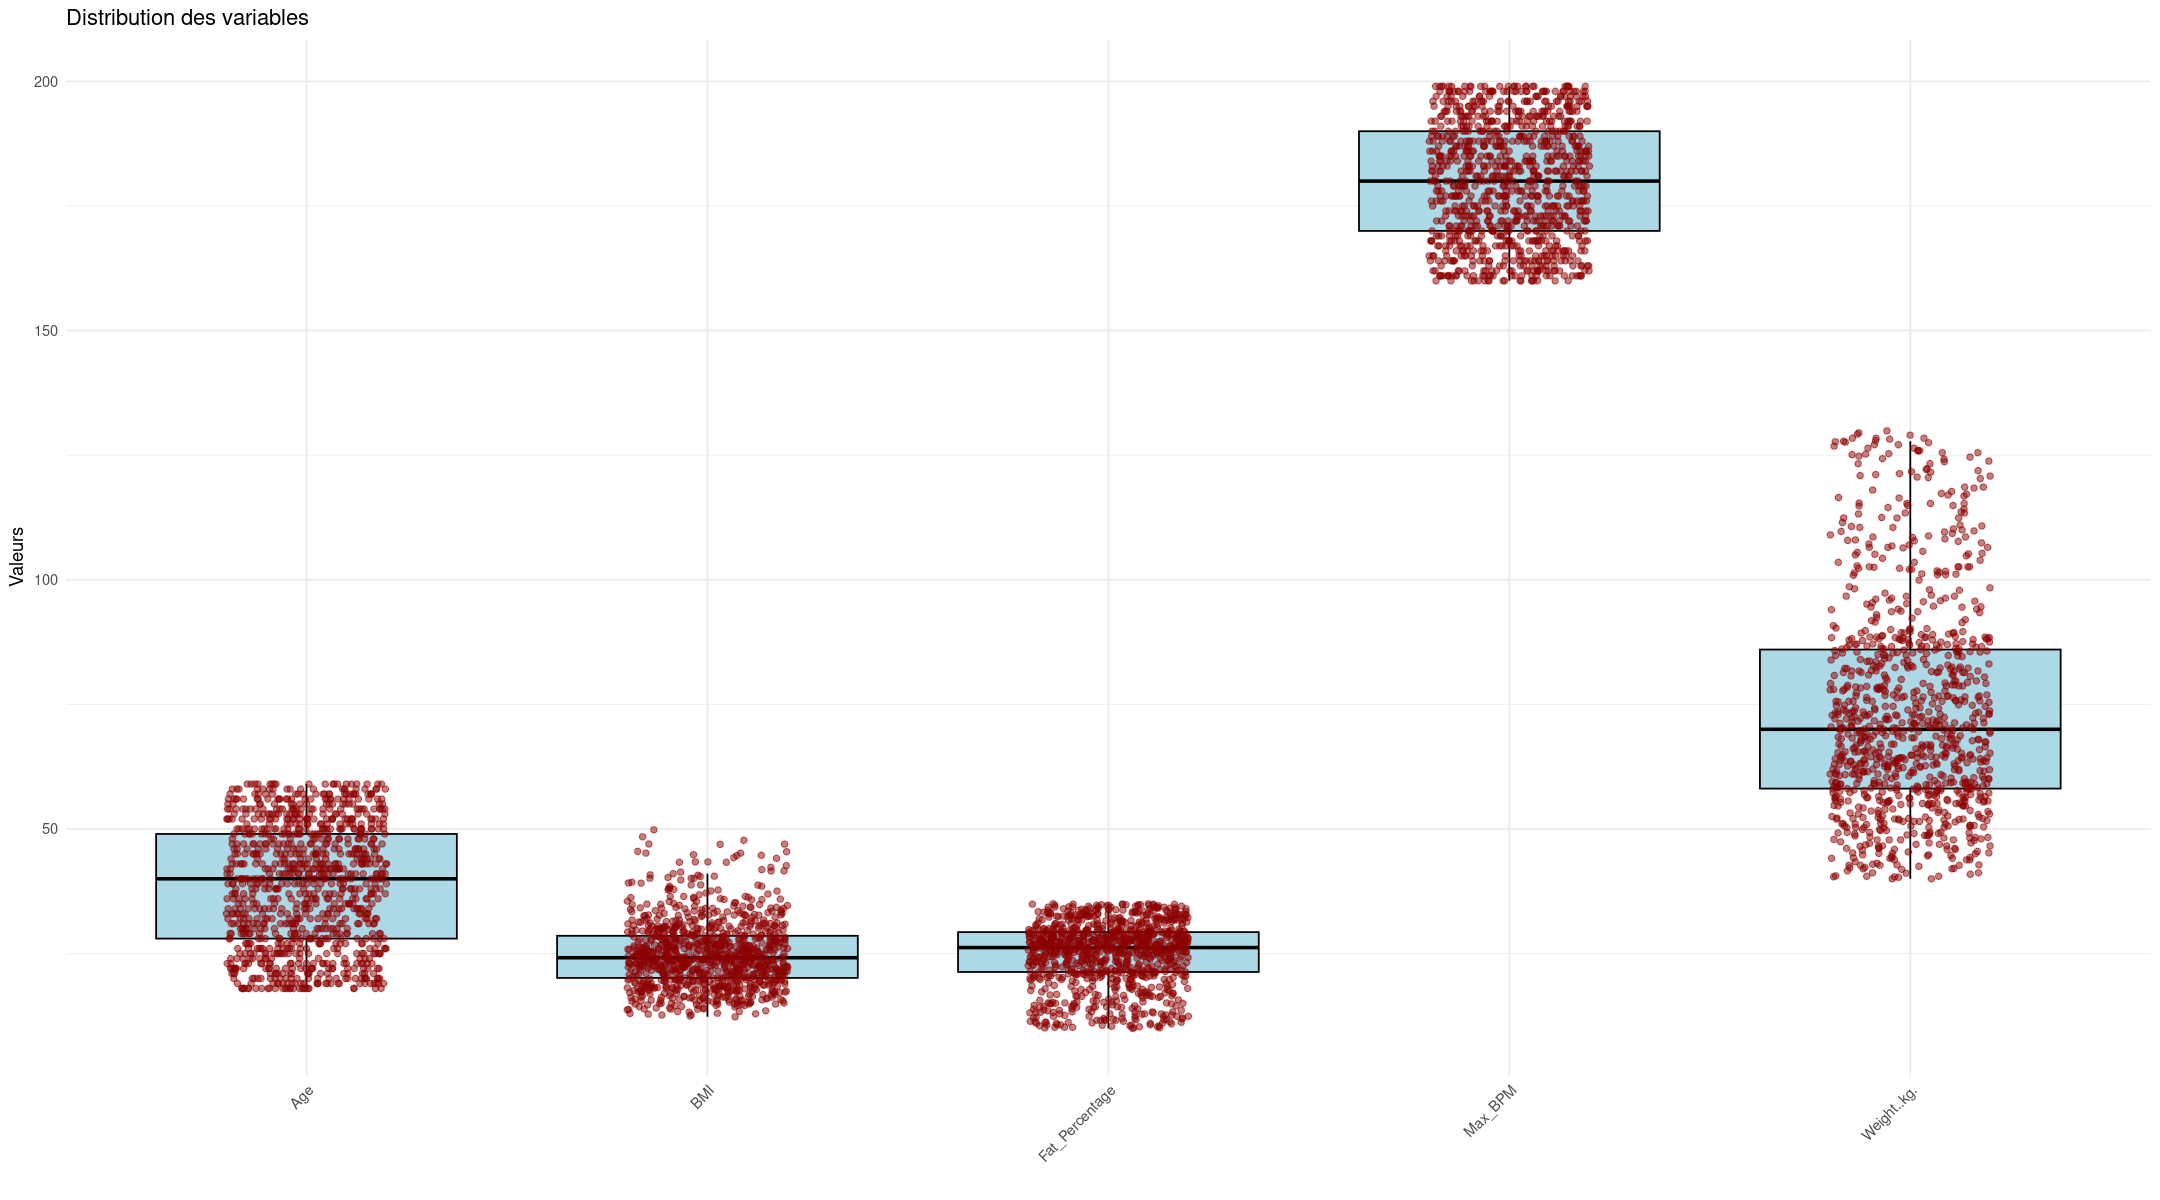

In [9]:
box_cols = c("Age", "Weight..kg.", "Max_BPM", "Fat_Percentage", "BMI" )

num_long <- num[box_cols] %>% 
  pivot_longer( cols = everything(), names_to = "Variable", values_to = "Valeur")
options(repr.plot.width = 18, repr.plot.height = 10)

ggplot(num_long, aes(x = Variable, y = Valeur)) +
  geom_boxplot(
    fill = "lightblue", 
    color = "black", 
    outlier.shape = NA
  ) +  
  geom_jitter(width = 0.2, alpha = 0.5, color = "darkred", size = 1.5 ) +
  labs( title = "Distribution des variables", x = "", y = "Valeurs" ) +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))  

- **Test de la normalité**

In [10]:
for (col in num_cols){
    print(paste("P-valeur de le test de Shapiro avec la variable ", col, ":" , shapiro.test(num[,col])$p.value))
}


[1] "P-valeur de le test de Shapiro avec la variable  Age : 1.46785906271979e-17"
[1] "P-valeur de le test de Shapiro avec la variable  Weight..kg. : 6.71695149569448e-19"
[1] "P-valeur de le test de Shapiro avec la variable  Height..m. : 2.1587709686282e-13"
[1] "P-valeur de le test de Shapiro avec la variable  Max_BPM : 6.42339692841957e-17"
[1] "P-valeur de le test de Shapiro avec la variable  Avg_BPM : 4.82916062930109e-17"
[1] "P-valeur de le test de Shapiro avec la variable  Resting_BPM : 1.13008435558791e-17"
[1] "P-valeur de le test de Shapiro avec la variable  Session_Duration..hours. : 3.50874865325256e-08"
[1] "P-valeur de le test de Shapiro avec la variable  Calories_Burned : 2.98249297630421e-05"
[1] "P-valeur de le test de Shapiro avec la variable  Fat_Percentage : 6.90289911678495e-18"
[1] "P-valeur de le test de Shapiro avec la variable  Water_Intake..liters. : 8.09672404832902e-17"
[1] "P-valeur de le test de Shapiro avec la variable  BMI : 1.43964092930437e-14"


$\rightarrow$ Au niveau 5%, tous les variables quantitatives ne suivent pas la loi normale

### <FONT COLOR="Orange">2.2. Variables qualitatives</font>

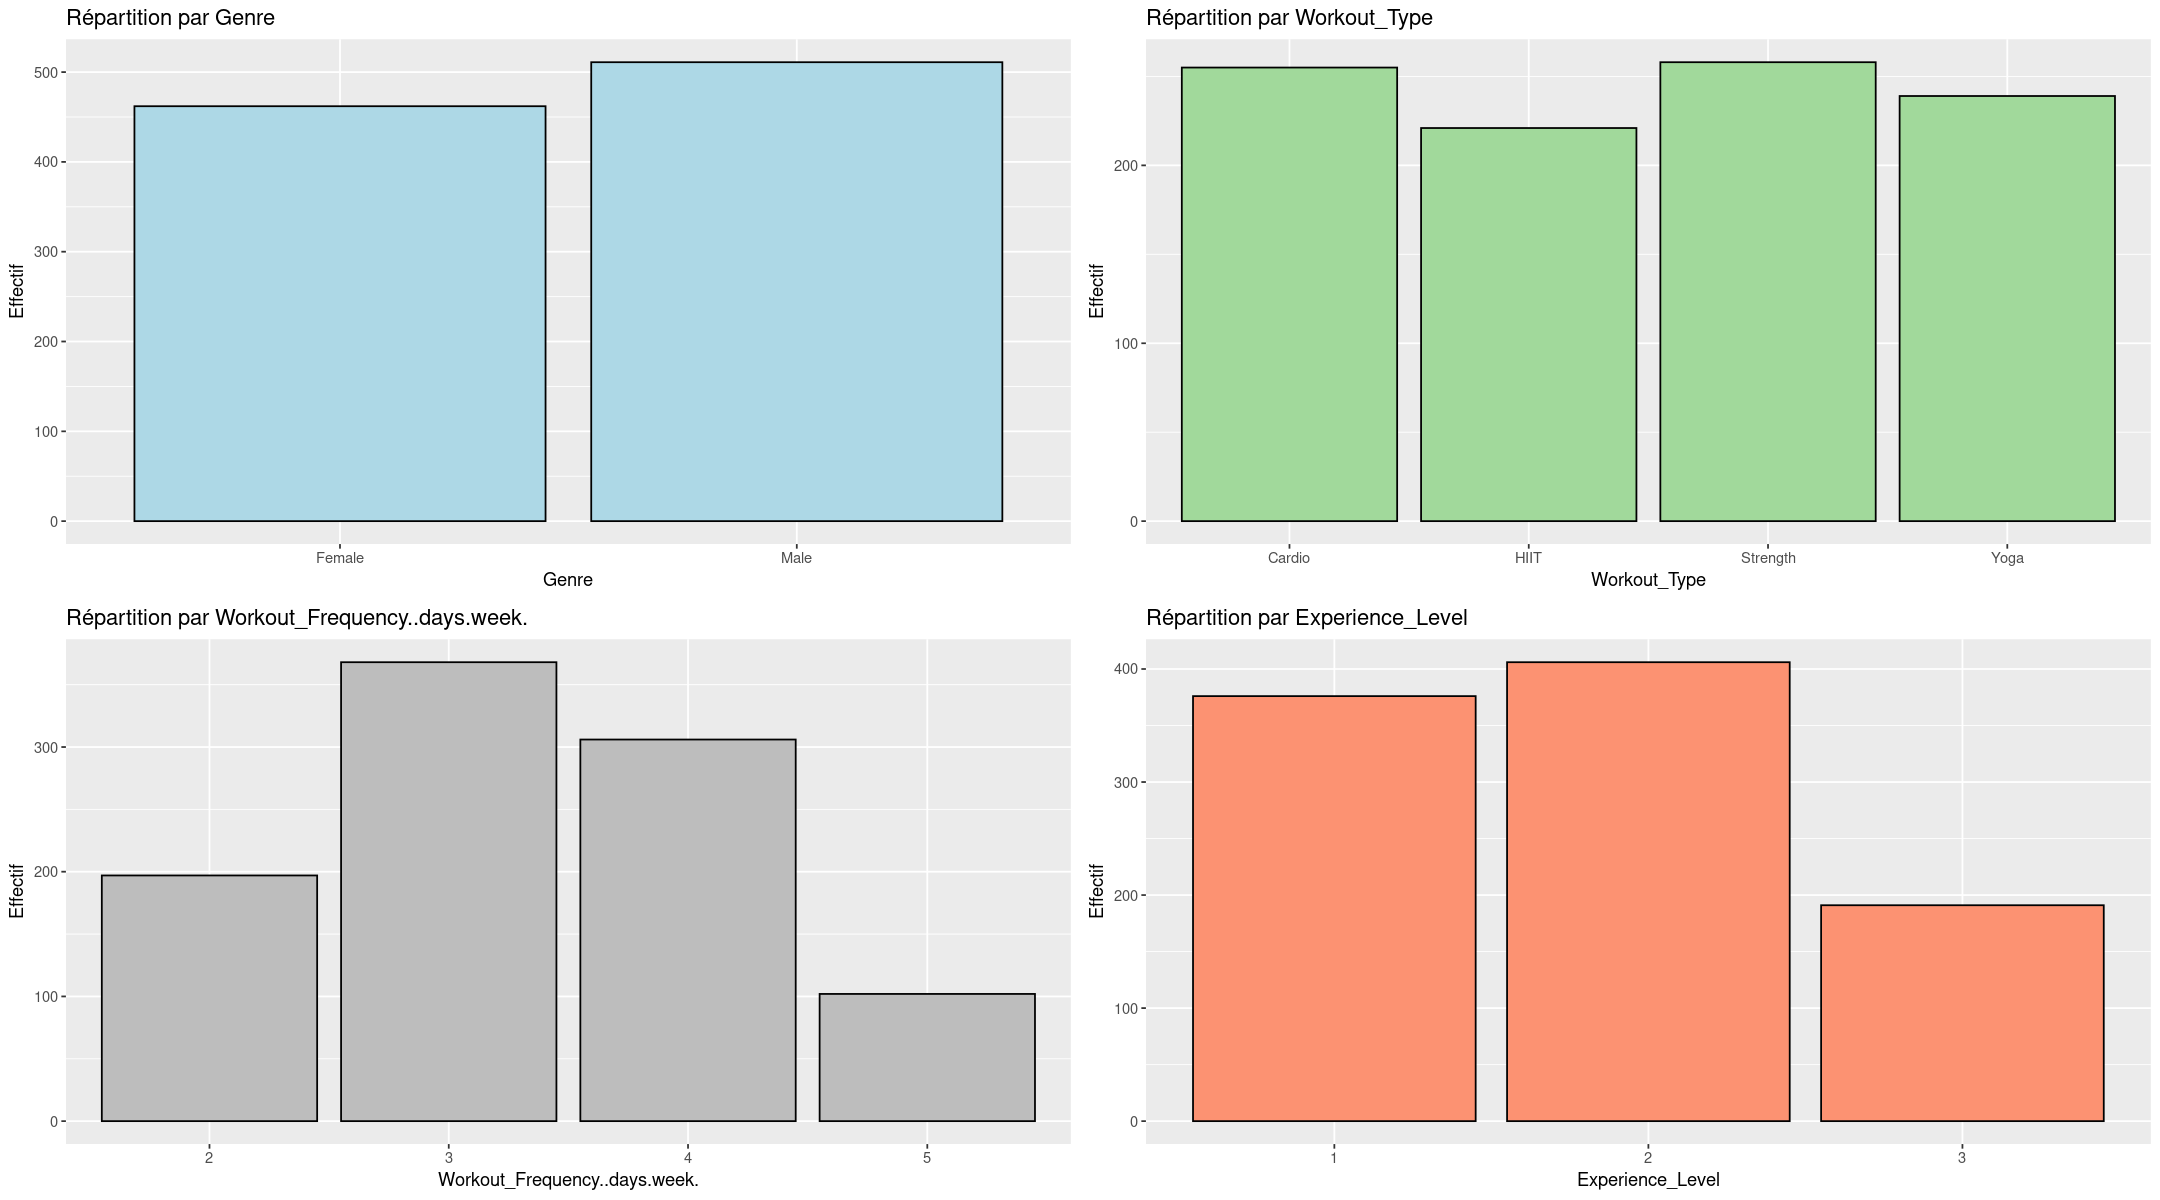

In [11]:
box_cat1 = ggplot(data, aes(x = Gender)) +
  geom_bar(fill = "lightblue", color = "black") + 
  labs(title = "Répartition par Genre", x = "Genre", y = "Effectif")
box_cat2 = ggplot(data, aes(x = Workout_Type)) +
  geom_bar(fill = brewer.pal(9, "Greens")[4], color = "black") +  
  labs(title = "Répartition par Workout_Type", x = "Workout_Type", y = "Effectif")
box_cat3 = ggplot(data, aes(x = Workout_Frequency..days.week.)) +
  geom_bar(fill = brewer.pal(9, "Greys")[4], color = "black") +  
  labs(title = "Répartition par Workout_Frequency..days.week.", x = "Workout_Frequency..days.week.", y = "Effectif")
box_cat4 = ggplot(data, aes(x = Experience_Level)) +
  geom_bar(fill = brewer.pal(9, "Reds")[4], color = "black") +  
  labs(title = "Répartition par Experience_Level", x = "Experience_Level", y = "Effectif")
options(repr.plot.width = 18, repr.plot.height = 10)

grid.arrange(box_cat1,box_cat2, box_cat3, box_cat4, ncol = 2)

## <FONT COLOR="Orange">3. Analyse descriptive bidimensionnelle</font>

### <FONT COLOR="Blue">3.1. Variable quantitative vs variable quantitative</font>

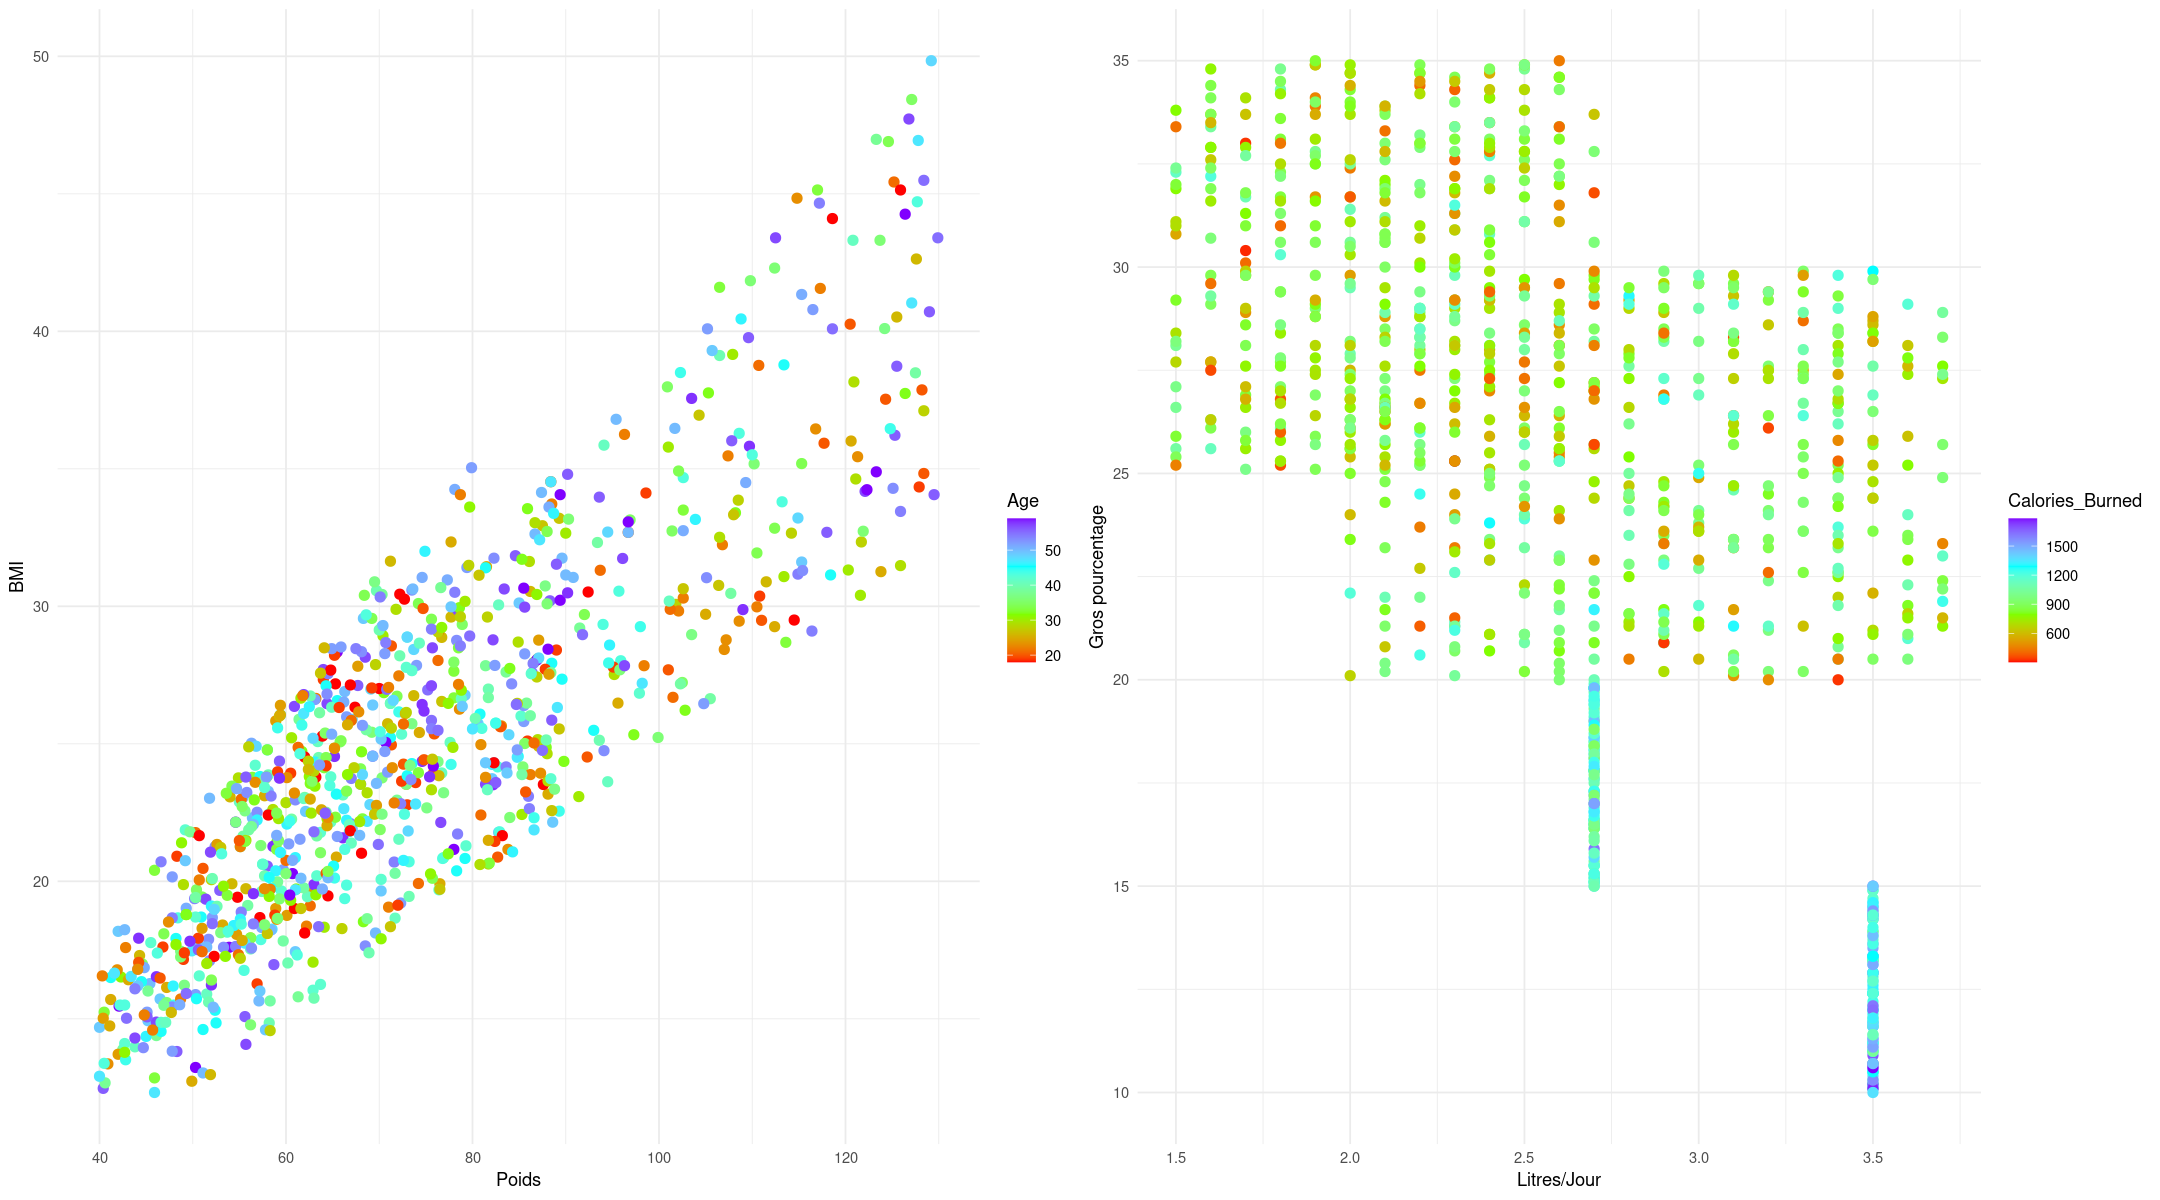

In [12]:
options(repr.plot.width = 18, repr.plot.height = 10)
scat1 = ggplot(data = data, aes(x = Weight..kg., y = BMI, color = Age))+
        geom_point(size = 2.5)+
        labs(x = "Poids", y = "BMI")+
        scale_colour_gradientn(colours=rainbow(4))+
        theme_minimal()
scat2 = ggplot(data = data)+
        geom_point(aes(x = Water_Intake..liters., y = Fat_Percentage, color = Calories_Burned ),size = 2.5)+
        labs(x = "Litres/Jour", y = "Gros pourcentage")+
        scale_colour_gradientn(colours=rainbow(4))+
        theme_minimal()
grid.arrange(scat1, scat2, ncol = 2)

- **Corrélation graphe**

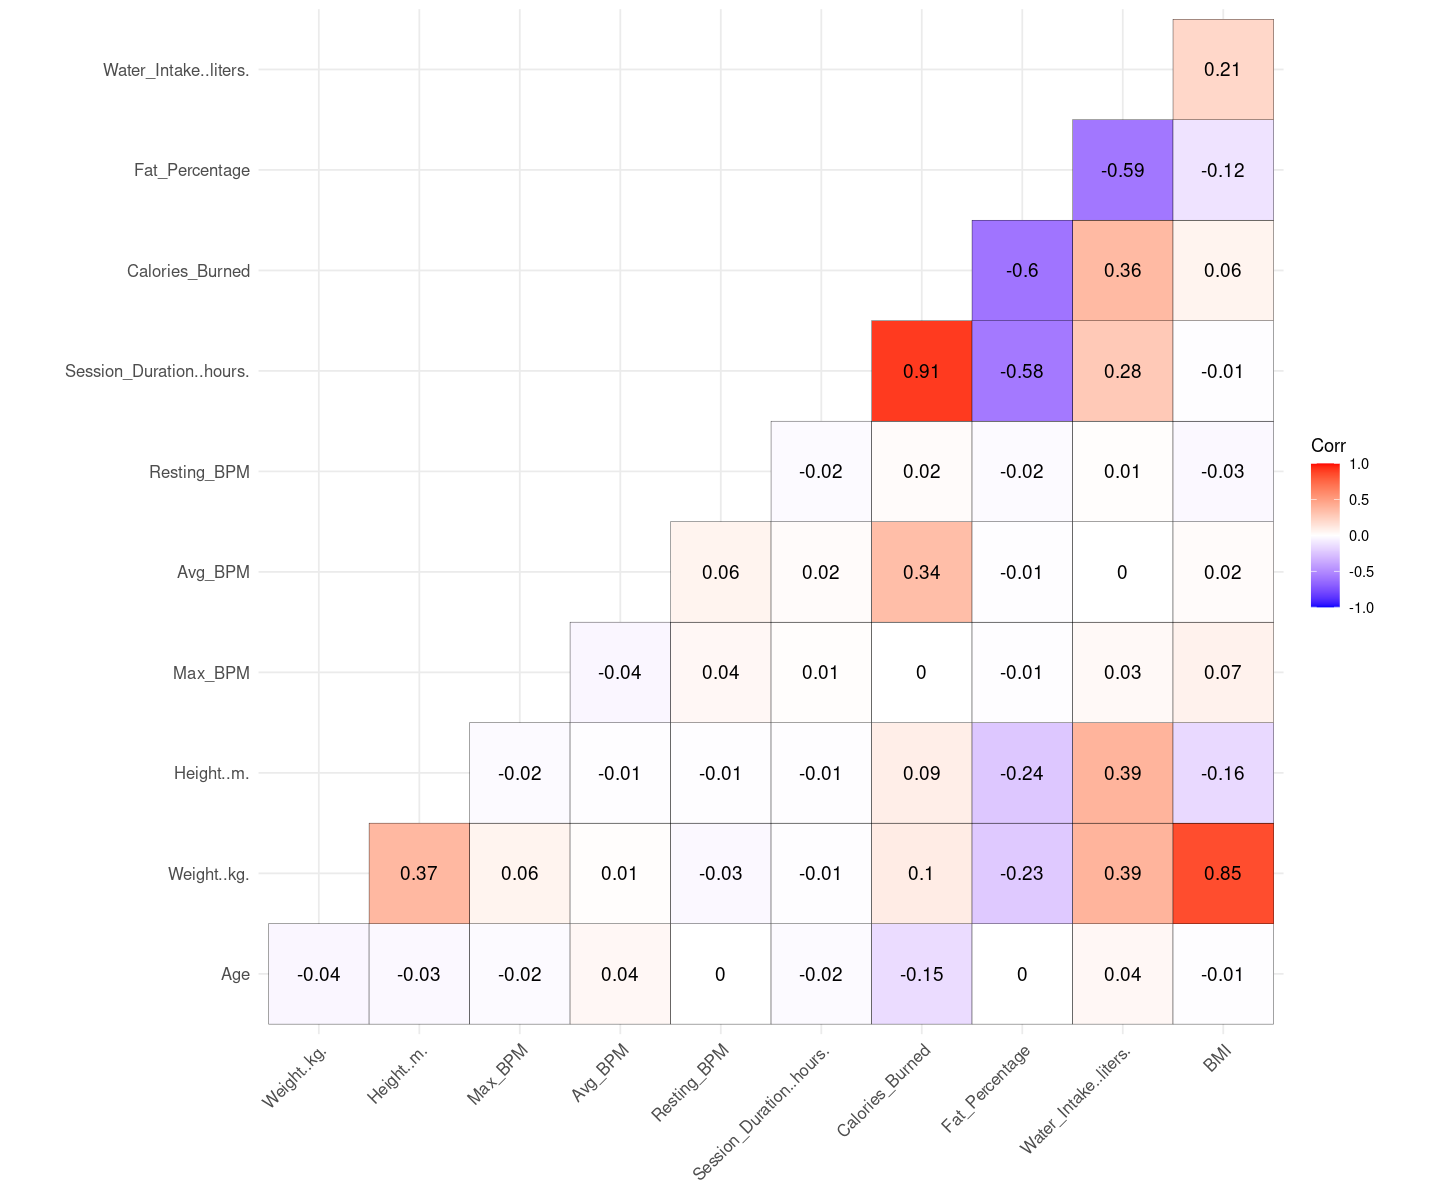

In [13]:
options(repr.plot.width = 12, repr.plot.height = 10)

ggcorrplot(cor(num), 
           method = "square",
           type = "lower",
           lab = TRUE,
           colors = c("blue", "white", "red"),
           outline.color = "black",
           tl.cex = 10)

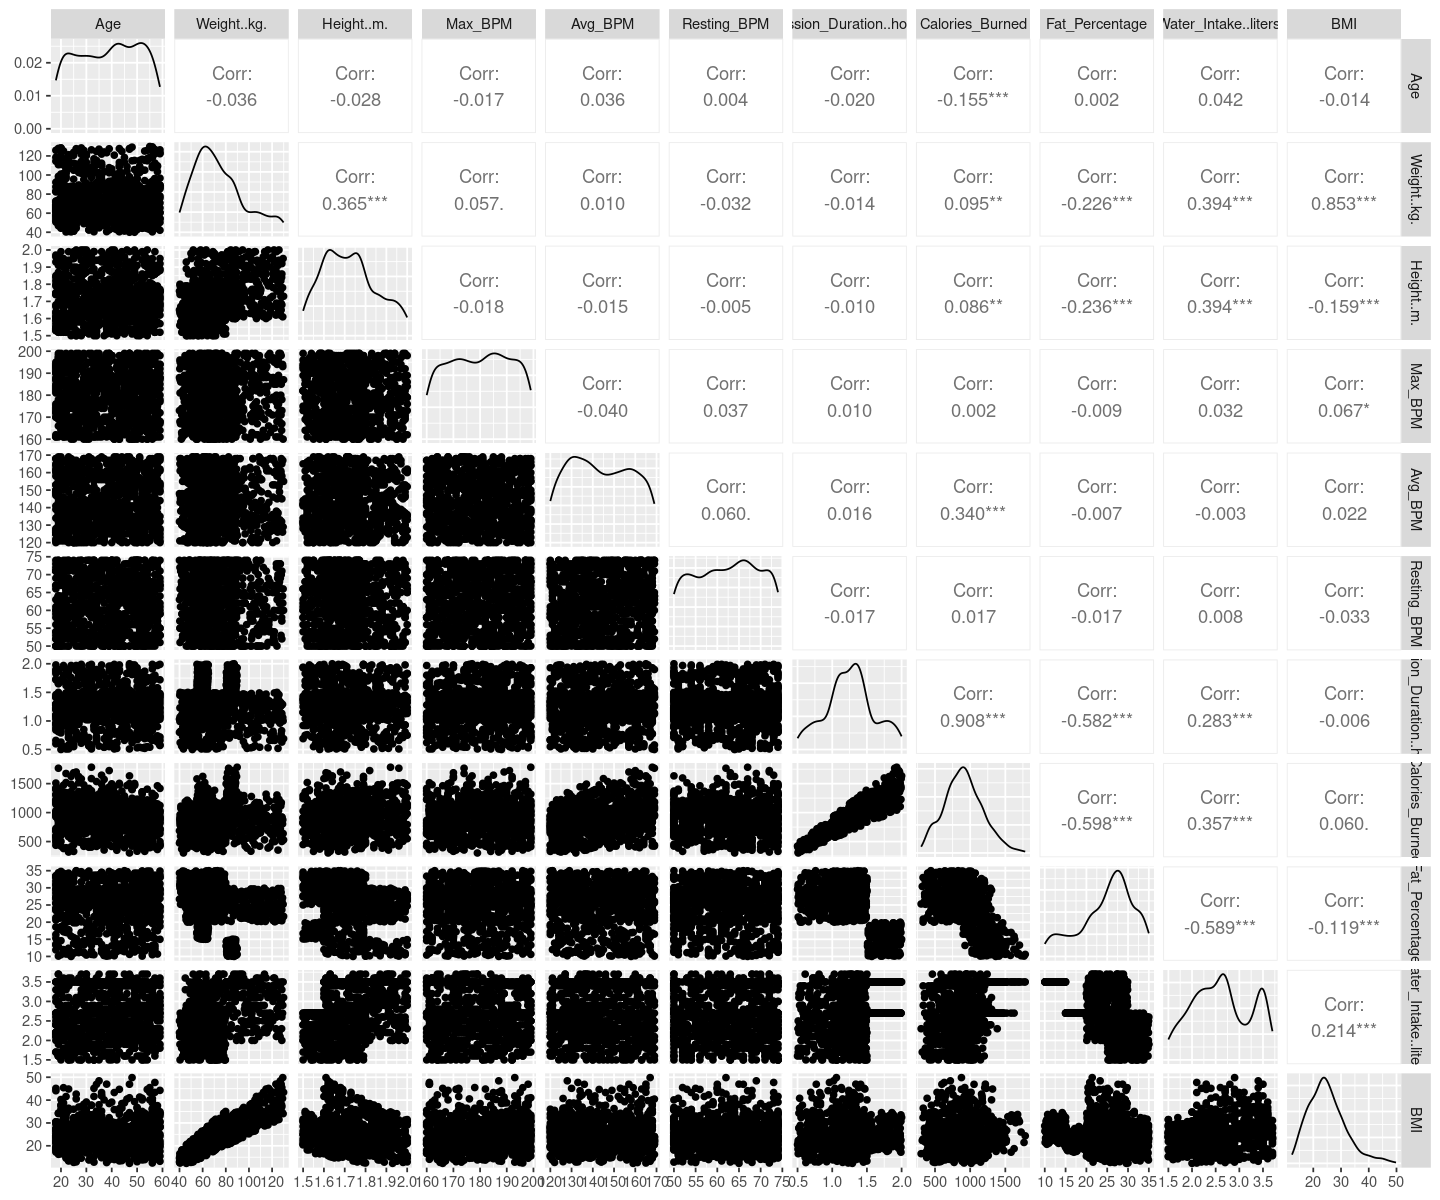

In [14]:
options(repr.plot.width = 12, repr.plot.height = 10)
ggpairs(num)

Nous obvervons que *Height..m.*, *Height..m.*, avec les variables de BPM sont bien indépendants. Alors que, *Height..m.* et *BMI* ou *Session_Duration..hours.* et *Calories_Burned* sont fortement corrélées.

### <FONT COLOR="Blue">3.2 Variable qualitative vs variable qualitative</font>

Warning message:
“The `scale_name` argument of `continuous_scale()` is deprecated as of ggplot2
3.5.0.”
Warning message:
“The `trans` argument of `continuous_scale()` is deprecated as of ggplot2 3.5.0.
ℹ Please use the `transform` argument instead.”
Warning message:
“`unite_()` was deprecated in tidyr 1.2.0.
ℹ Please use `unite()` instead.
ℹ The deprecated feature was likely used in the ggmosaic package.
  Please report the issue at <https://github.com/haleyjeppson/ggmosaic>.”


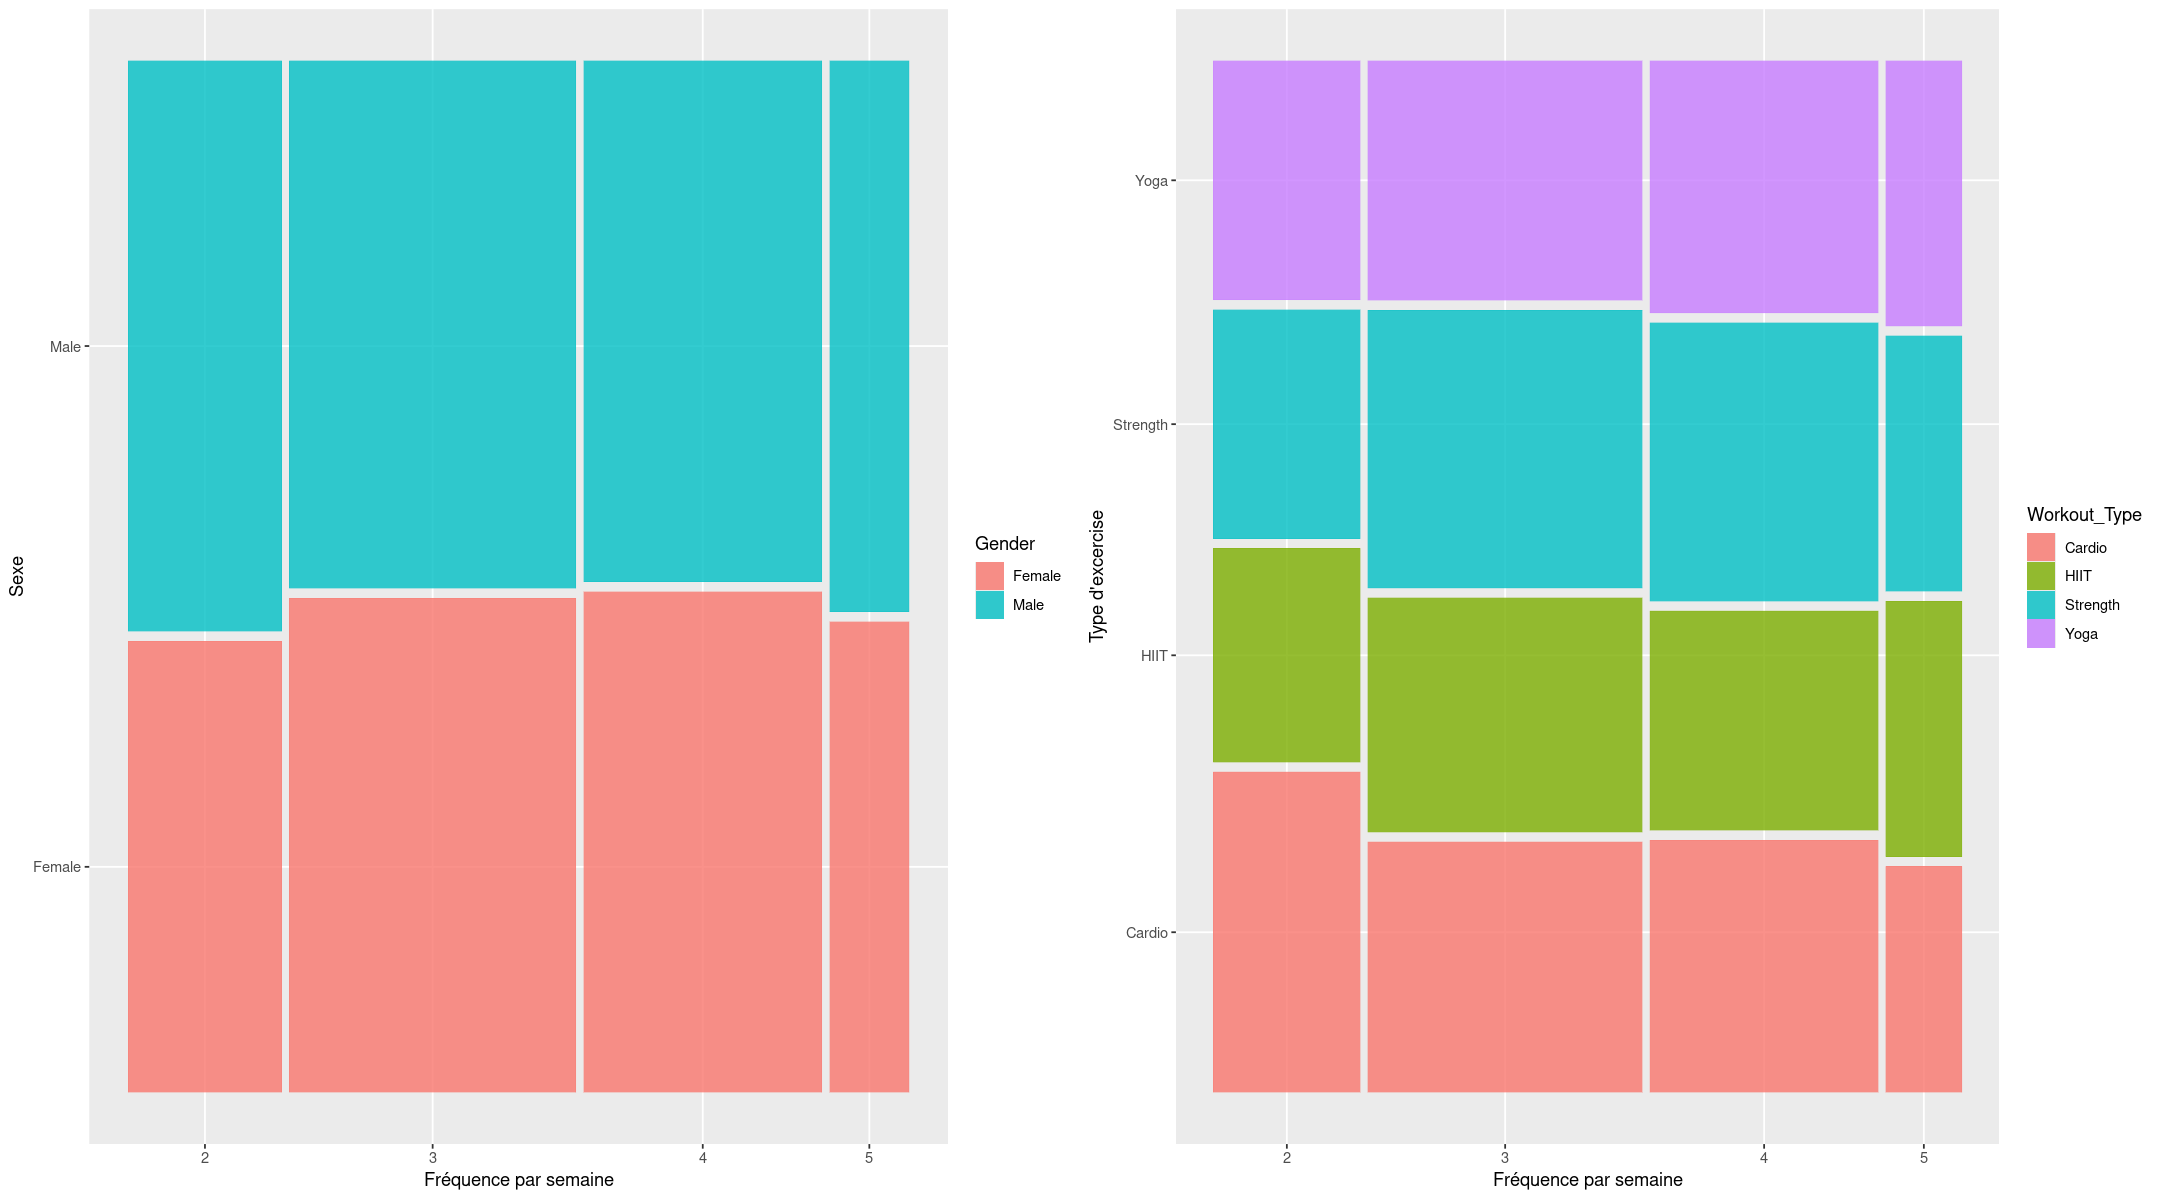

In [15]:
mos1 = ggplot(data = data)+
geom_mosaic(aes(x = product(Gender,Workout_Frequency..days.week.), fill = Gender))+
labs(x = "Fréquence par semaine", y = "Sexe")
mos2 = ggplot(data = data)+
geom_mosaic(aes(x = product(Workout_Type ,Workout_Frequency..days.week.), fill = Workout_Type ))+
labs(x = "Fréquence par semaine", y = "Type d'excercise")
options(repr.plot.width = 18, repr.plot.height = 10)
grid.arrange(mos1, mos2, ncol = 2)

### <FONT COLOR="Blue">3.3. Variable qualitative vs variable quantitative</font>

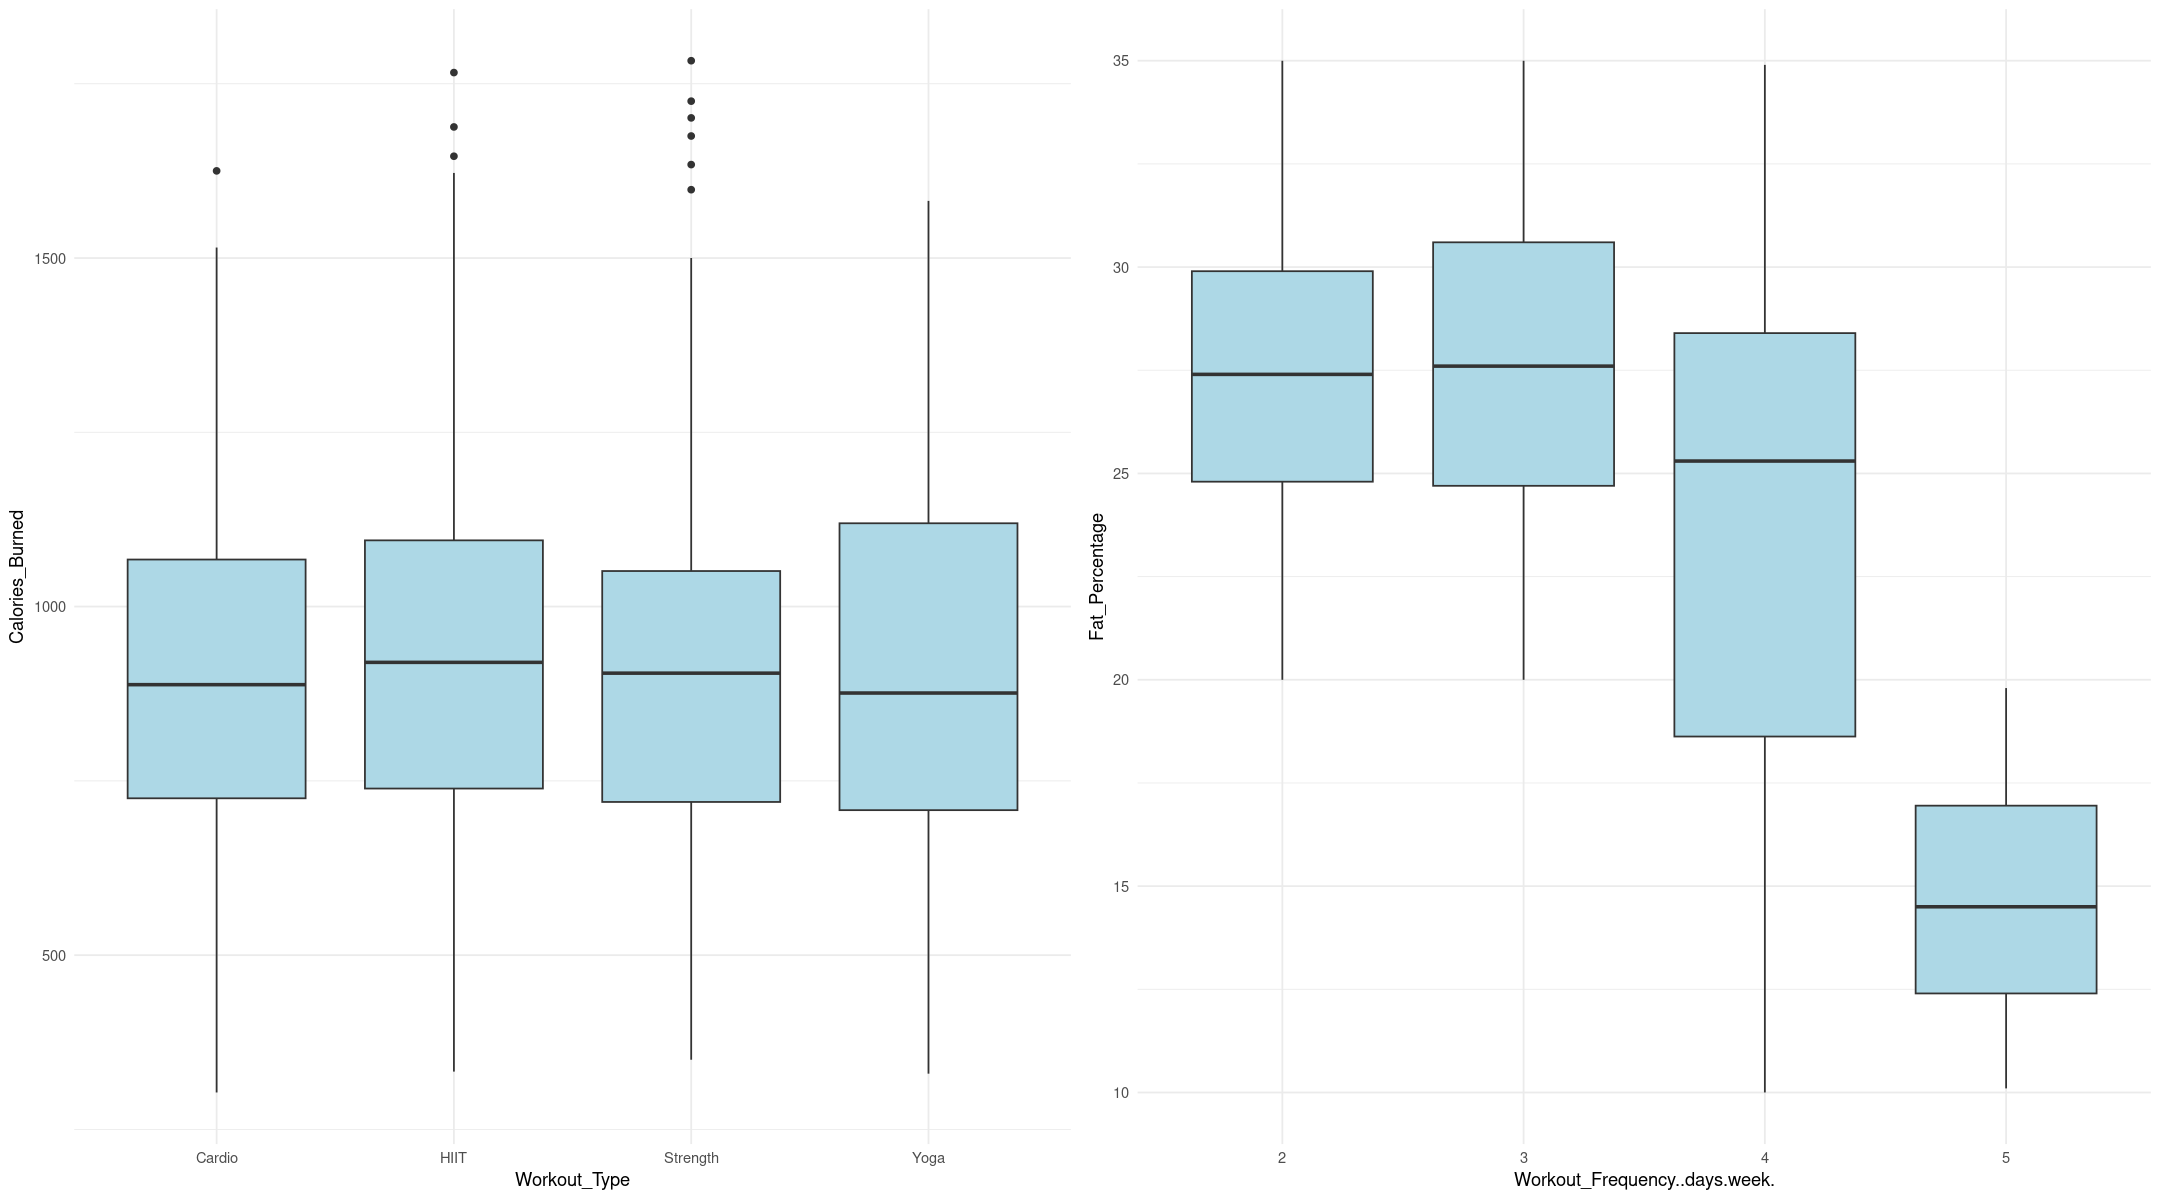

In [16]:
box2 = ggplot(data)+
geom_boxplot(aes(x = Workout_Frequency..days.week., y = Fat_Percentage), fill = "lightblue")+
theme_minimal()
box1 = ggplot(data)+
geom_boxplot(aes(x = Workout_Type , y = Calories_Burned  ), fill = "lightblue")+
theme_minimal()

grid.arrange(box1,box2, ncol = 2)

## <FONT COLOR="Orange">4. Analyse composants principales des variables quantitatives</font>

In [17]:
pca_cols = append('Gender' ,num_cols)

In [18]:
res.pca = PCA(data[,pca_cols], scale.unit = TRUE, graph = FALSE, quali.sup =1, ncp = ncol(num) )
summary(res.pca)


Call:
PCA(X = data[, pca_cols], scale.unit = TRUE, ncp = ncol(num),  
     quali.sup = 1, graph = FALSE) 


Eigenvalues
                       Dim.1   Dim.2   Dim.3   Dim.4   Dim.5   Dim.6   Dim.7
Variance               2.927   1.894   1.275   1.076   1.035   1.016   0.906
% of var.             26.612  17.220  11.588   9.783   9.412   9.240   8.234
Cumulative % of var.  26.612  43.832  55.420  65.203  74.616  83.855  92.089
                       Dim.8   Dim.9  Dim.10  Dim.11
Variance               0.526   0.322   0.015   0.006
% of var.              4.784   2.931   0.140   0.056
Cumulative % of var.  96.873  99.804  99.944 100.000

Individuals (the 10 first)
                             Dist    Dim.1    ctr   cos2    Dim.2    ctr   cos2
1                        |  3.734 |  3.185  0.356  0.728 | -0.200  0.002  0.003
2                        |  2.670 | -1.092  0.042  0.167 |  0.311  0.005  0.014
3                        |  2.903 | -1.785  0.112  0.378 |  0.385  0.008  0.018
4          

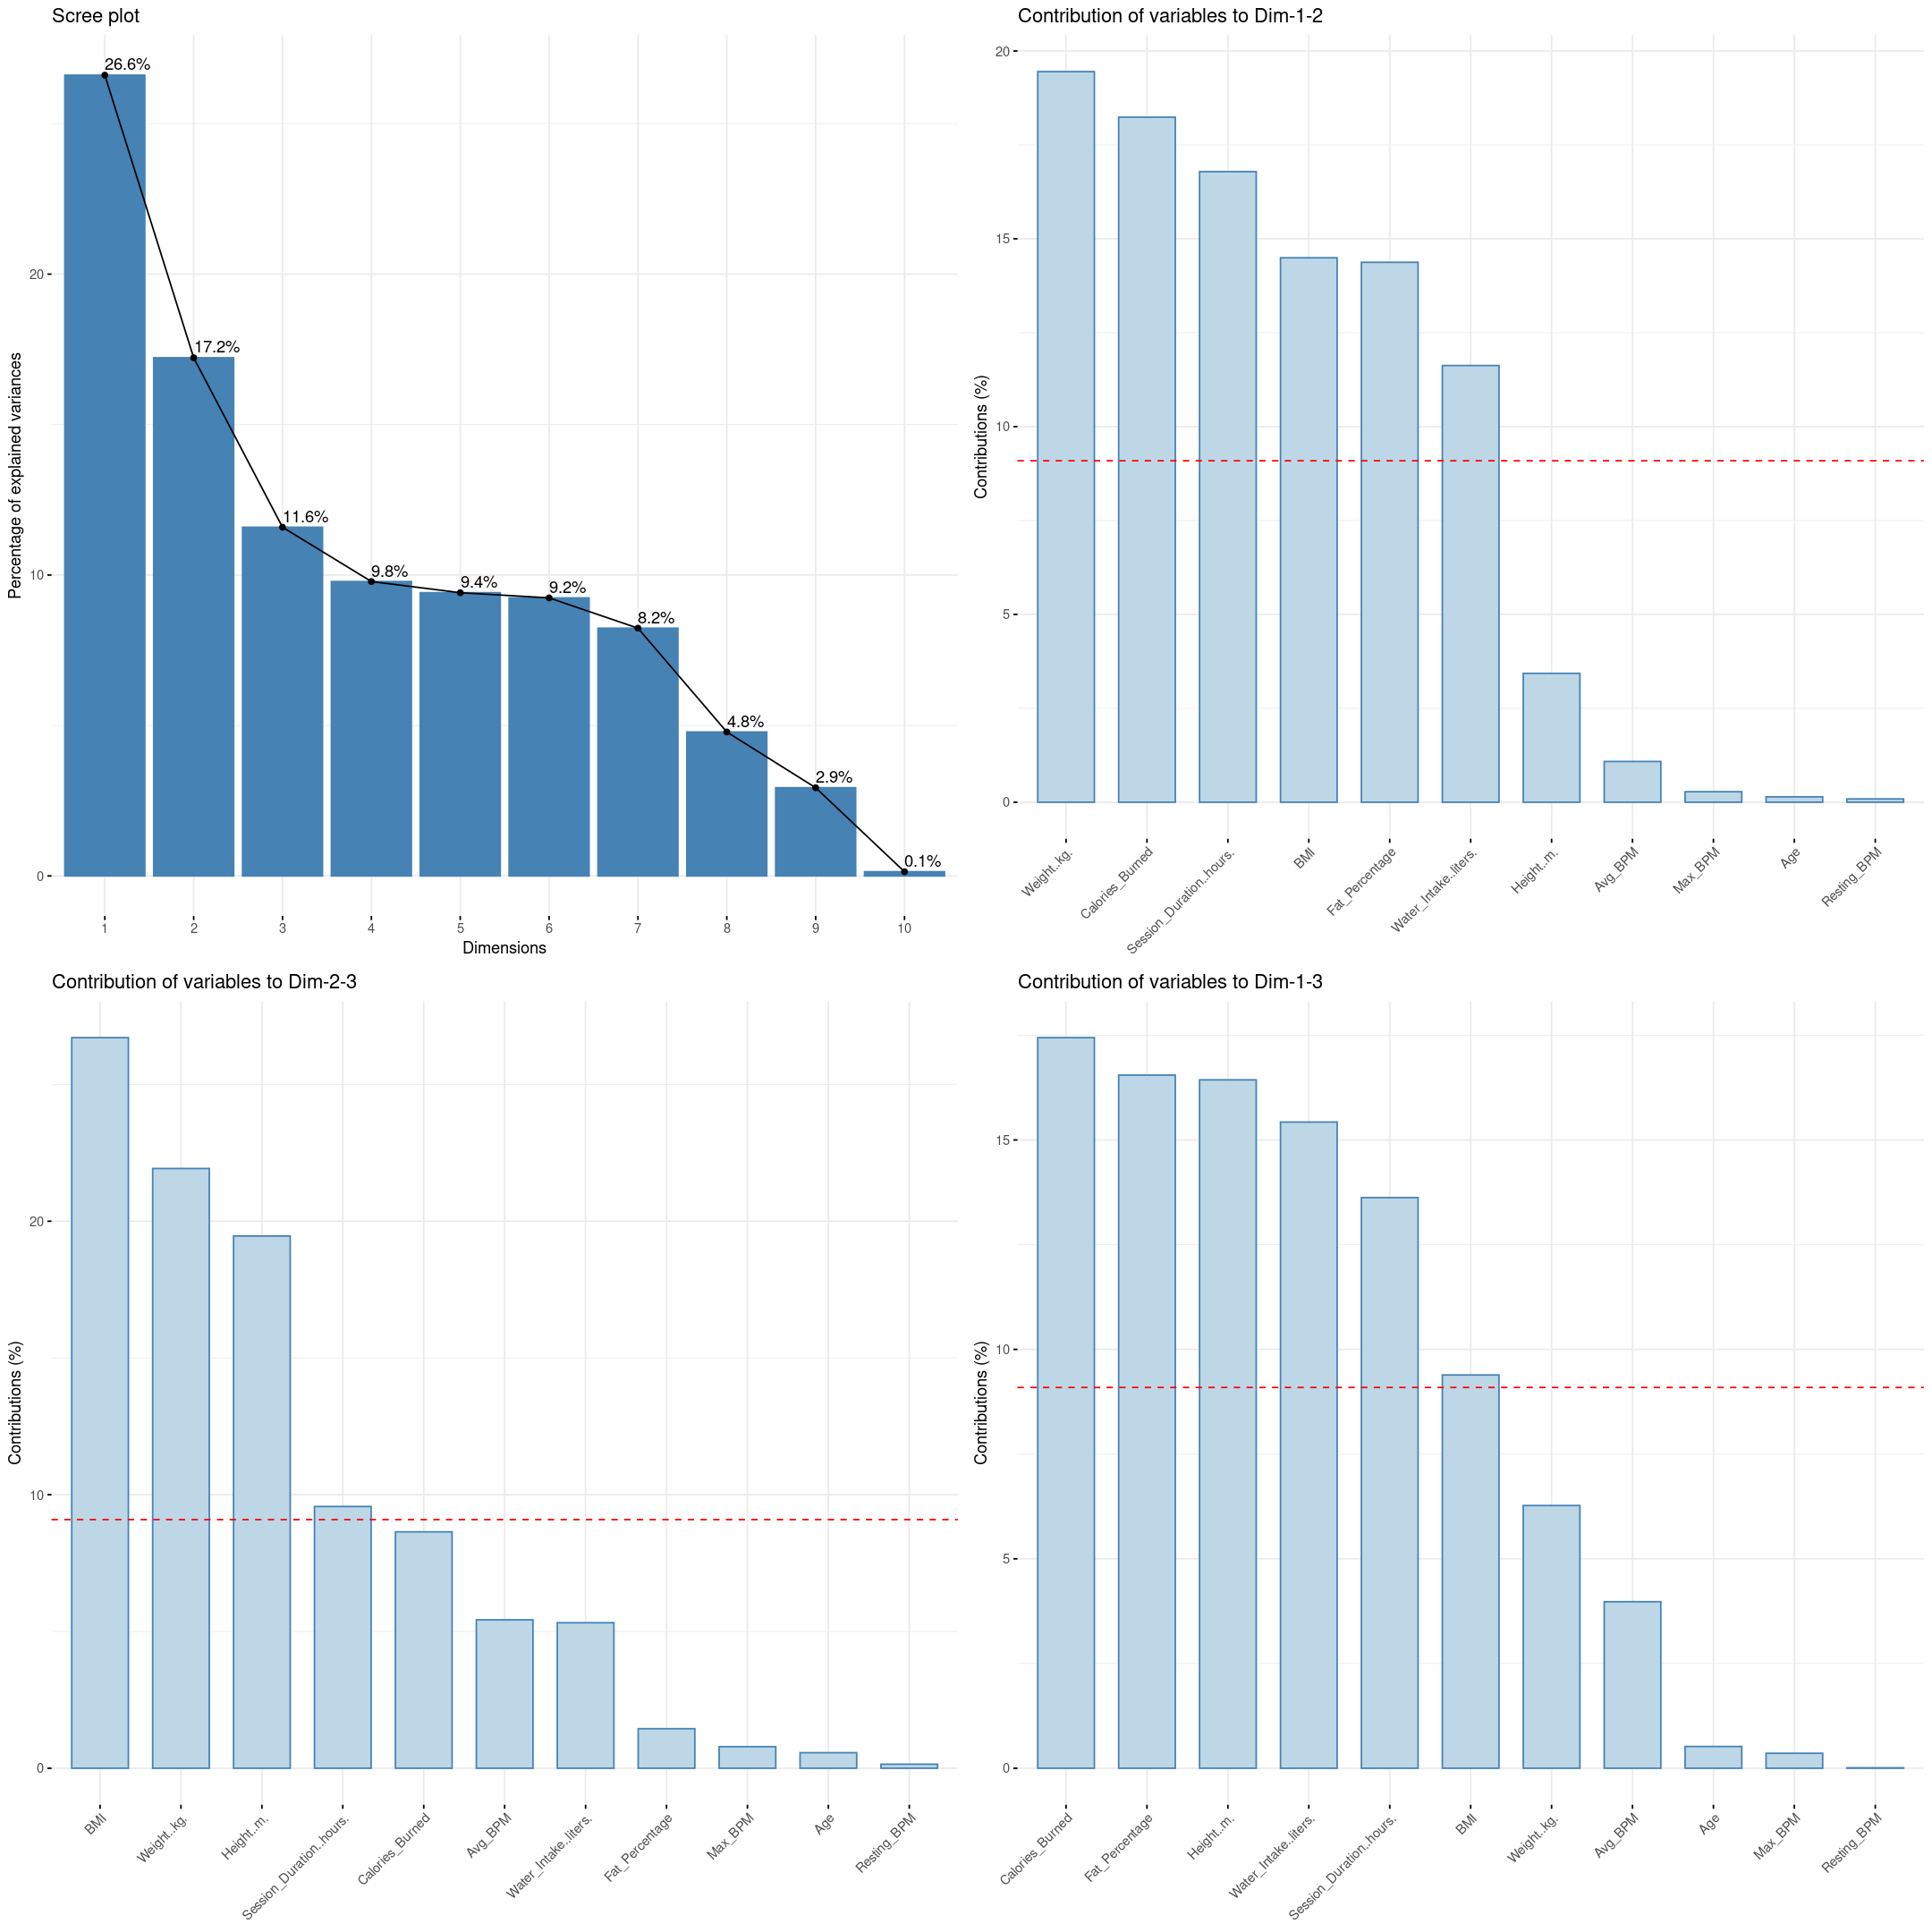

In [19]:
eig_p = fviz_eig(res.pca, addlabels = TRUE)
cont_p12 = fviz_contrib(res.pca, choice = 'var', axes = c(1,2), fill = brewer.pal(5, "Blues")[2])
cont_p23 = fviz_contrib(res.pca, choice = 'var', axes = c(2,3),fill = brewer.pal(5, "Blues")[2])
cont_p13 = fviz_contrib(res.pca, choice = 'var', axes = c(1,3),fill = brewer.pal(5, "Blues")[2])
options(repr.plot.width = 18, repr.plot.height = 18)
grid.arrange(eig_p, cont_p12,cont_p23, cont_p13, ncol = 2)

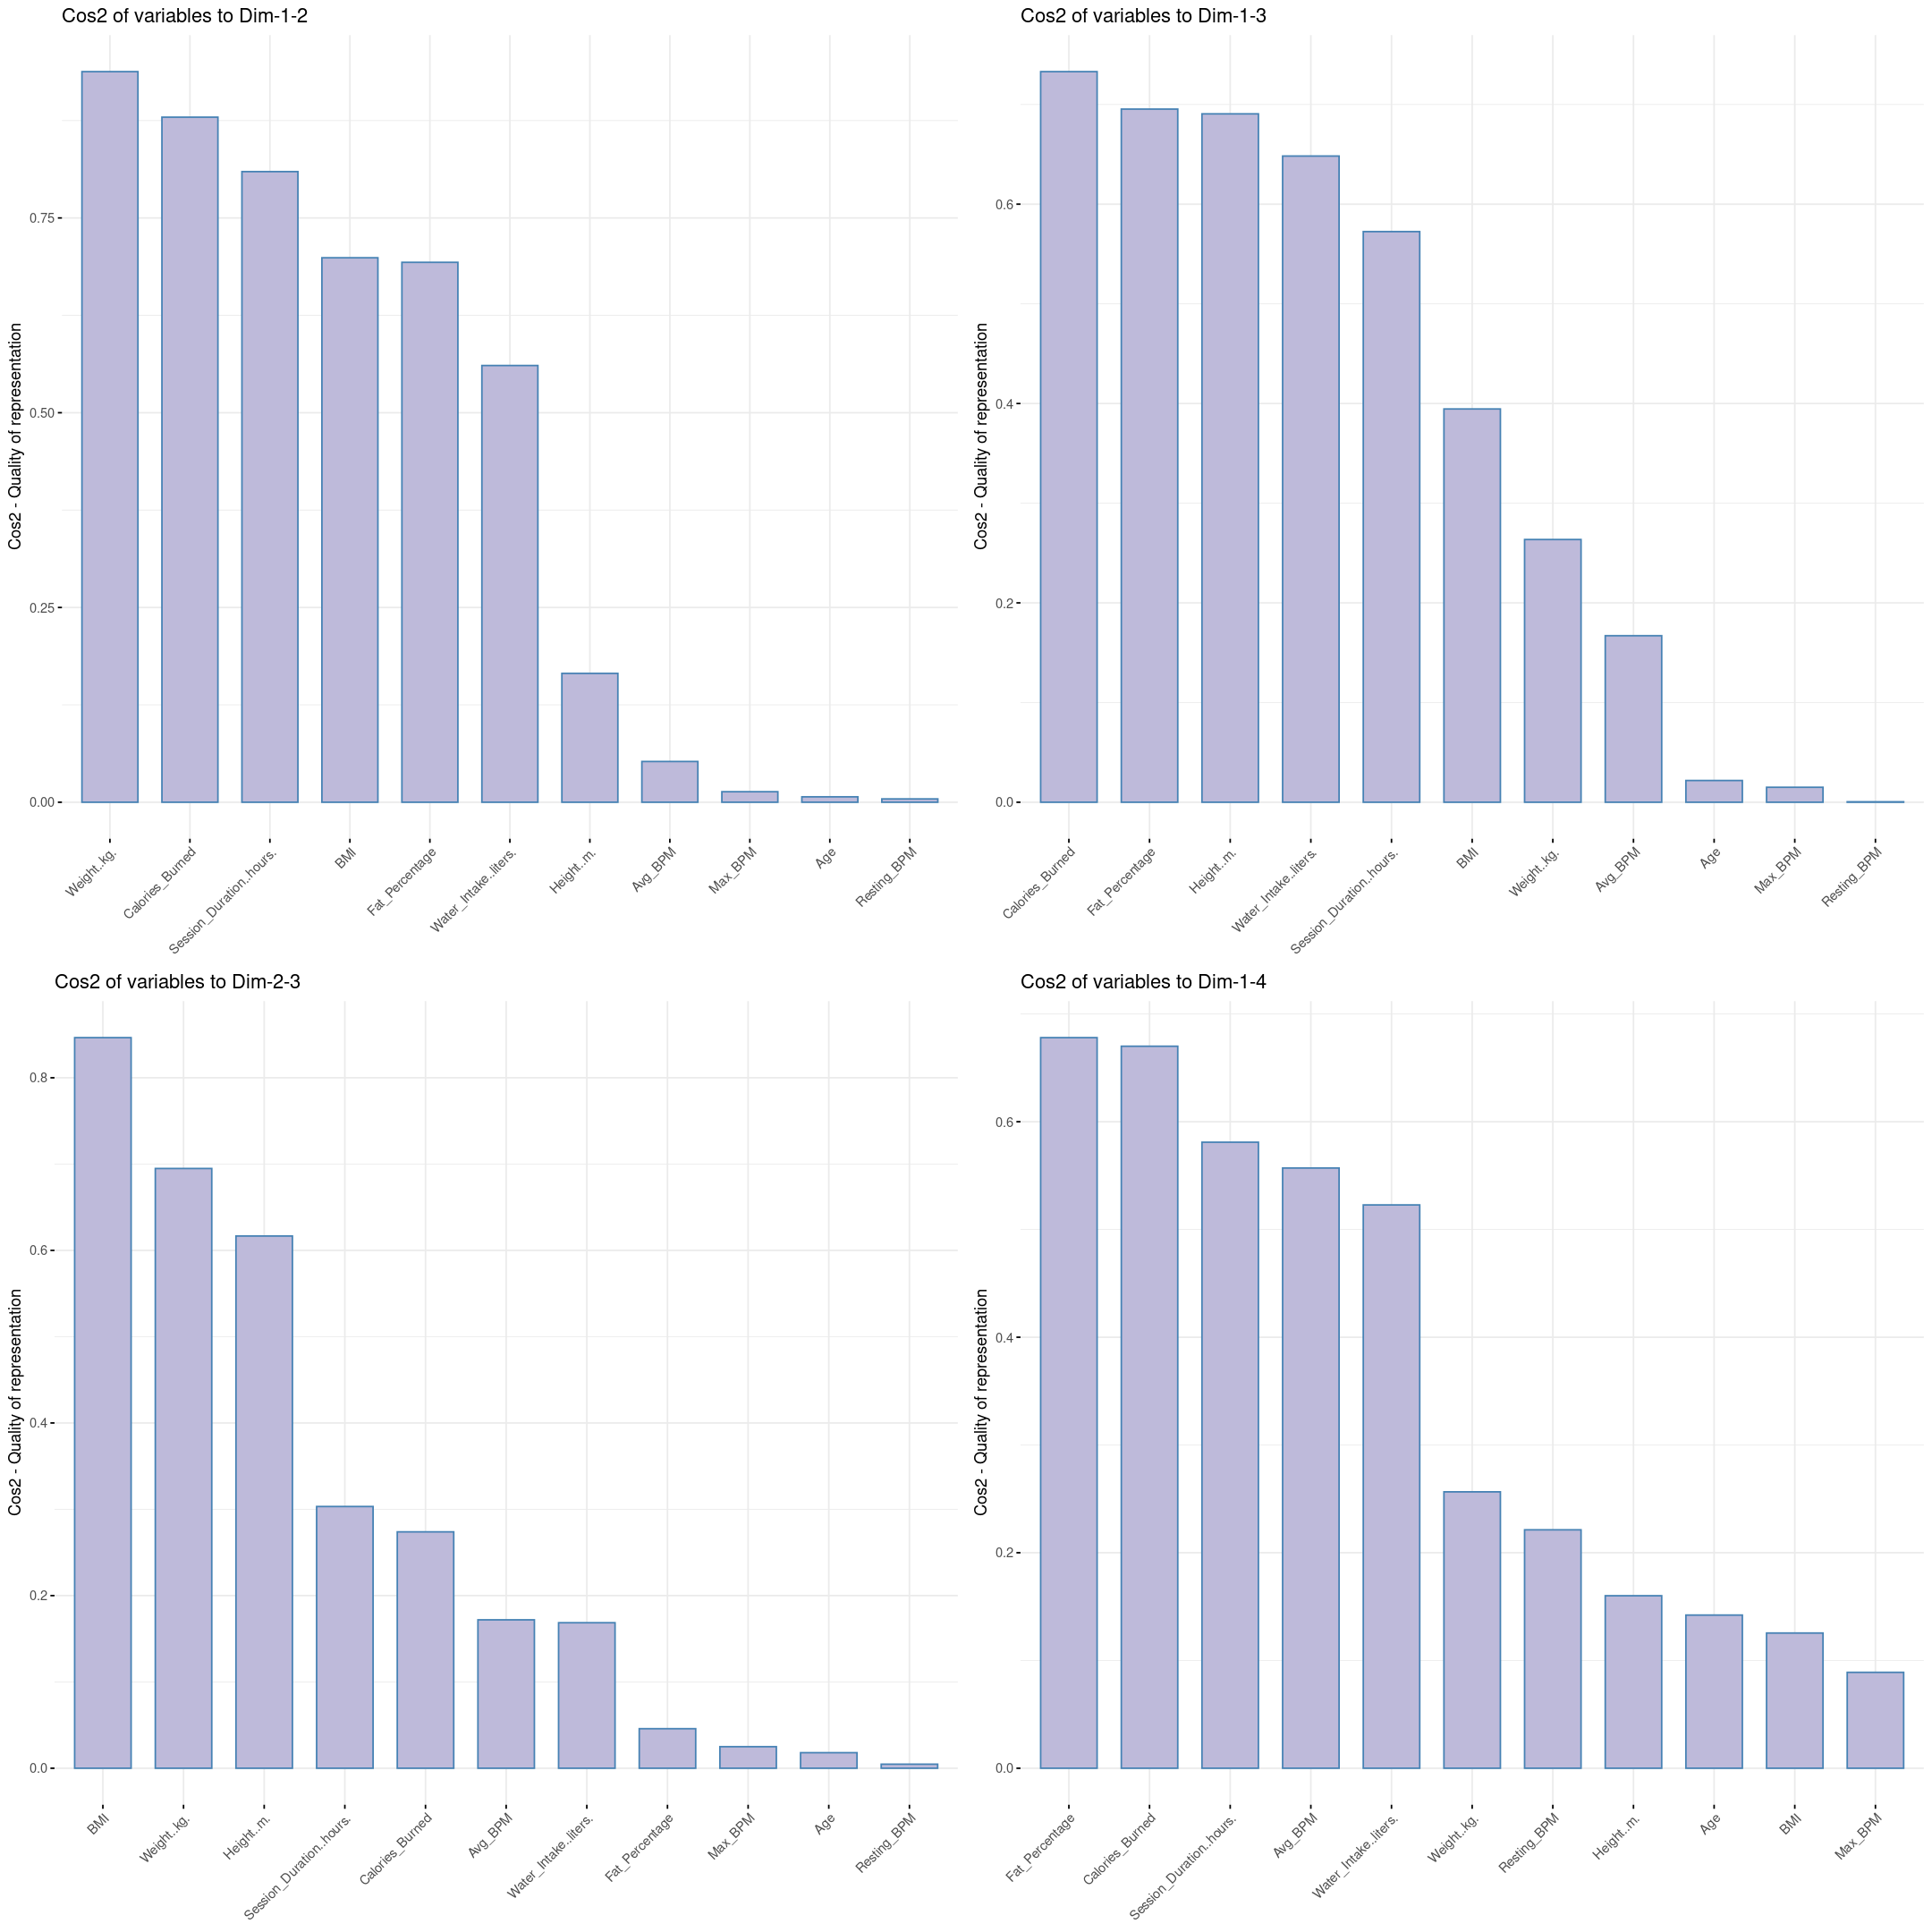

In [20]:
cos12 = fviz_cos2(res.pca, choice = 'var', fill =brewer.pal(3, "Set3")[3], axes = c(1,2))
cos13 = fviz_cos2(res.pca, choice = 'var', fill =brewer.pal(3, "Set3")[3], axes = c(1,3))
cos23 = fviz_cos2(res.pca, choice = 'var', fill =brewer.pal(3, "Set3")[3], axes = c(2,3))
cos14 = fviz_cos2(res.pca, choice = 'var', fill =brewer.pal(3, "Set3")[3], axes = c(1,4))
options(repr.plot.width = 18, repr.plot.height = 18)
grid.arrange(cos12, cos13,cos23, cos14, ncol = 2, nrow = 2)

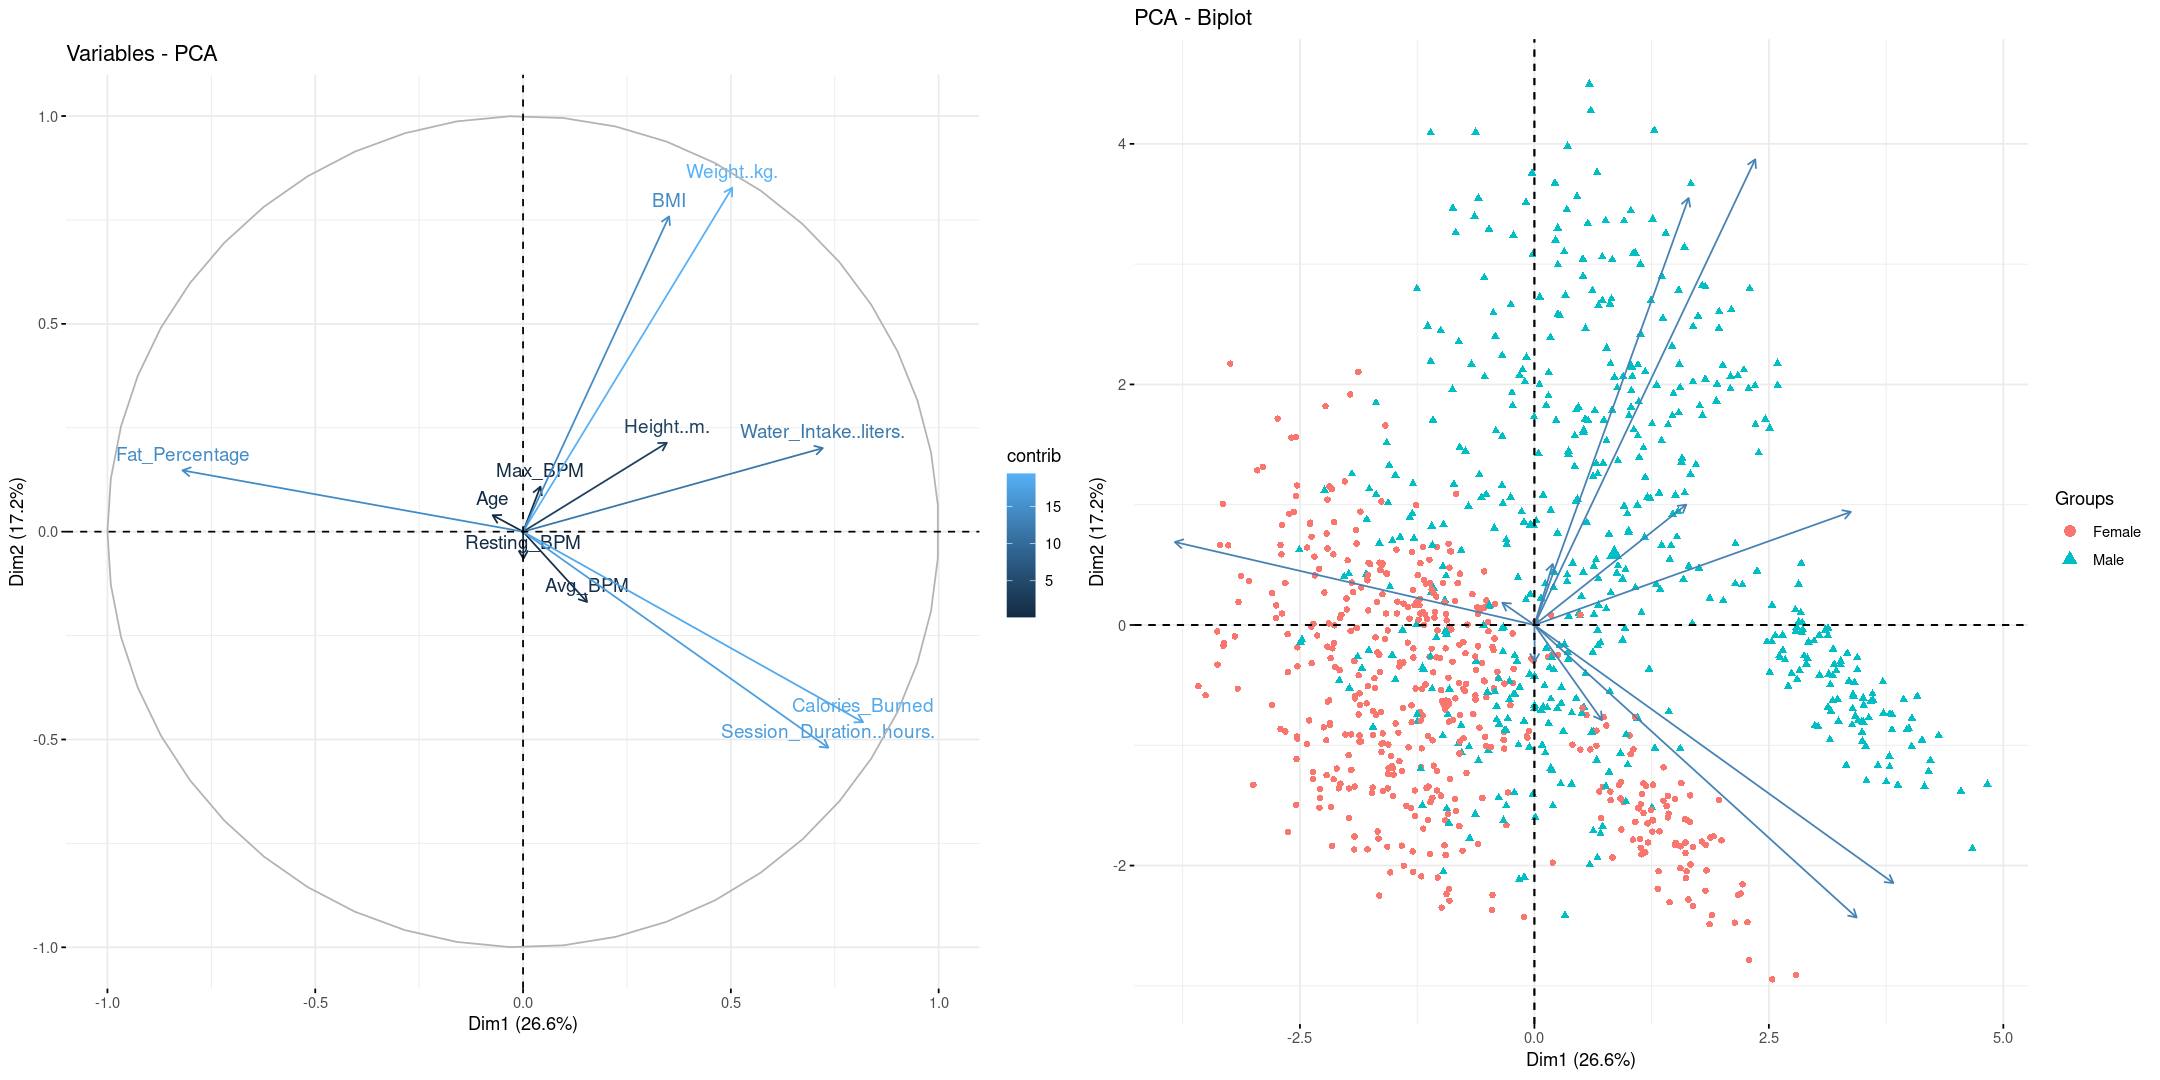

In [21]:
pca_var = fviz_pca_var(res.pca ,col.var  ='contrib')
bi_plot = fviz_pca_biplot(res.pca, habillage = data$Gender, label = 'none')
options(repr.plot.width = 18, repr.plot.height = 9)
grid.arrange(pca_var, bi_plot, ncol = 2 )

[1] "#EFF3FF" "#BDD7E7" "#6BAED6" "#3182BD" "#08519C"

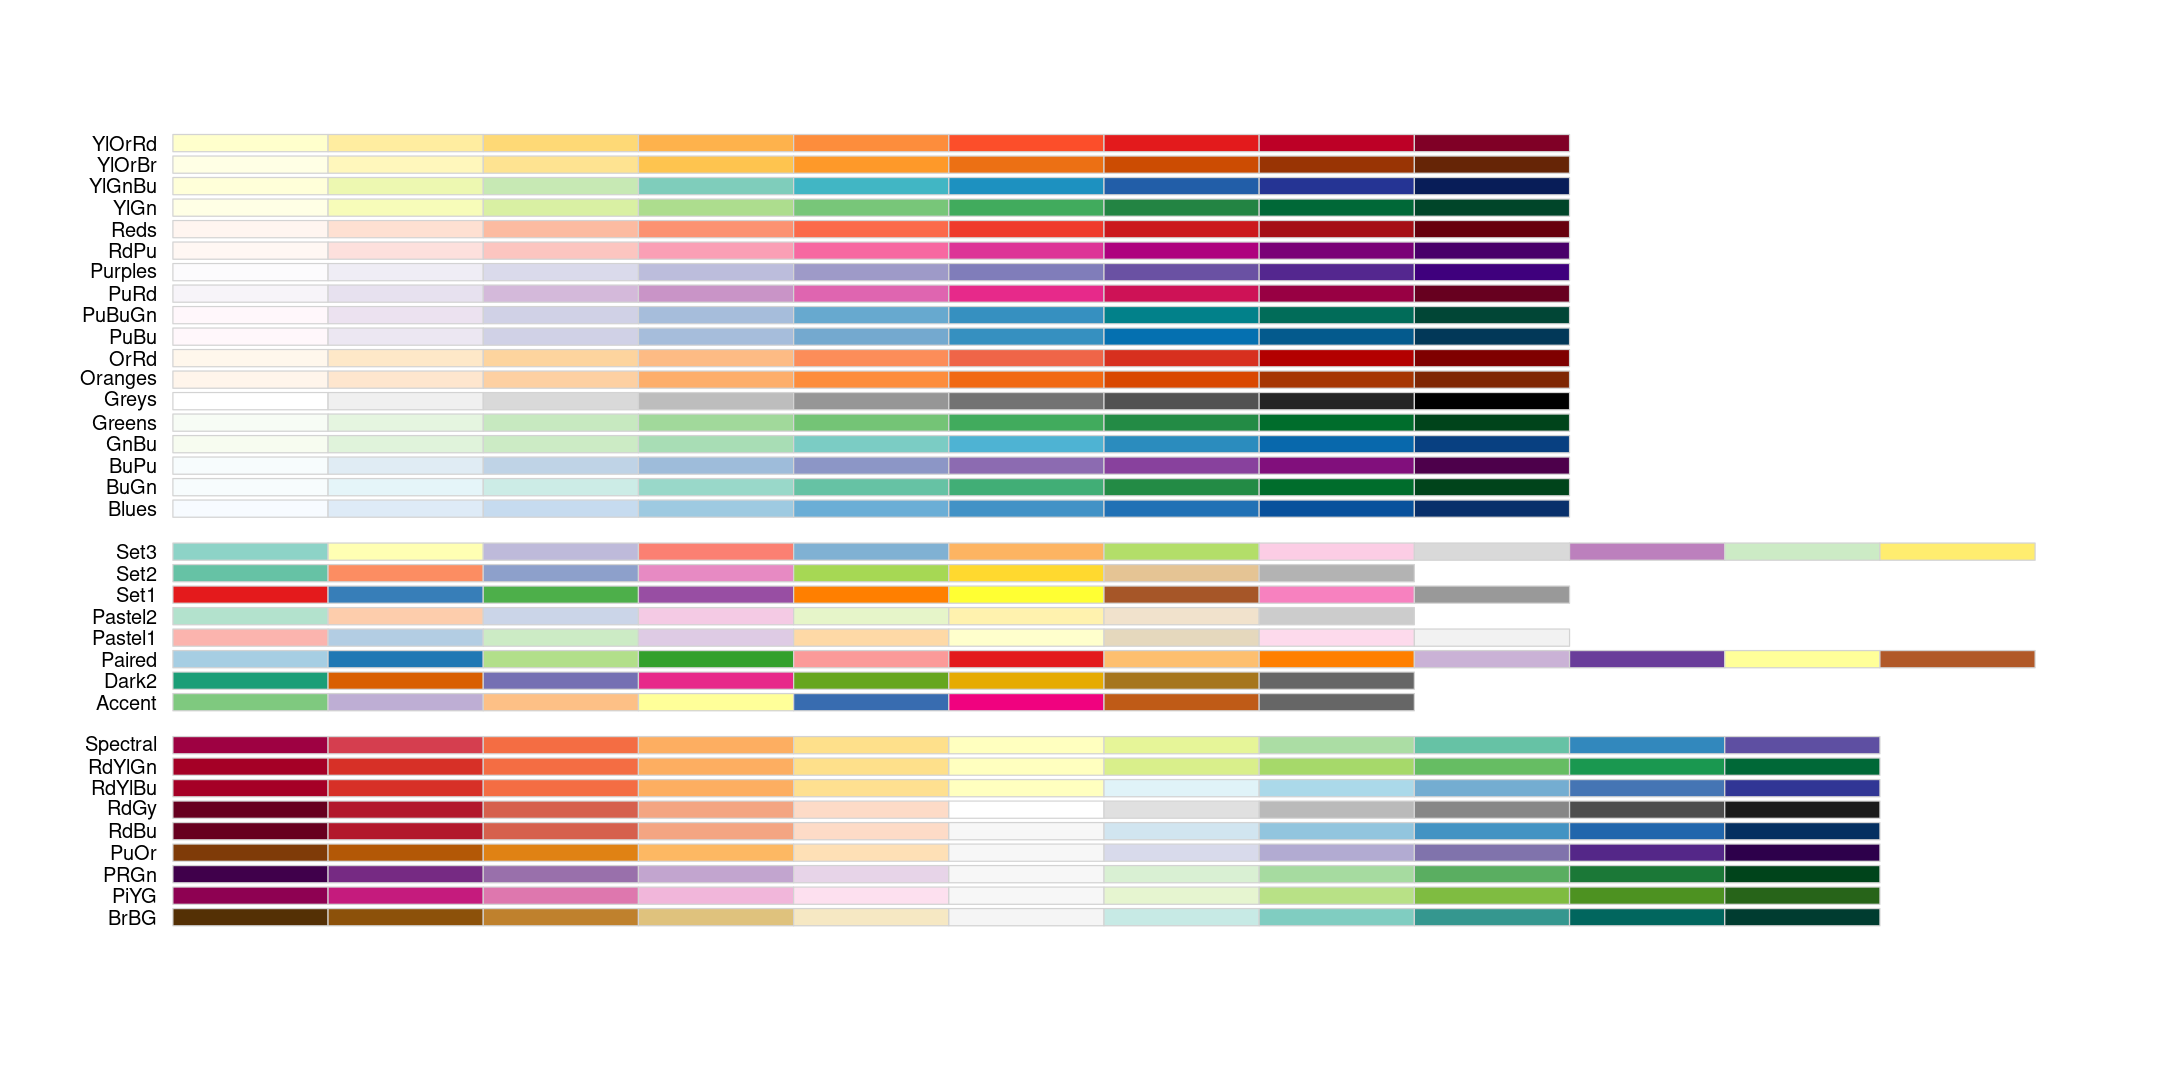

In [22]:
display.brewer.all()
brewer.pal(5, "Blues")

## <FONT COLOR="Green">Partie II: Modélisation</font>

- **Transformation les variables**

In [23]:
summary(data)

      Age           Gender     Weight..kg.       Height..m.       Max_BPM     
 Min.   :18.00   Female:462   Min.   : 40.00   Min.   :1.500   Min.   :160.0  
 1st Qu.:28.00   Male  :511   1st Qu.: 58.10   1st Qu.:1.620   1st Qu.:170.0  
 Median :40.00                Median : 70.00   Median :1.710   Median :180.0  
 Mean   :38.68                Mean   : 73.85   Mean   :1.723   Mean   :179.9  
 3rd Qu.:49.00                3rd Qu.: 86.00   3rd Qu.:1.800   3rd Qu.:190.0  
 Max.   :59.00                Max.   :129.90   Max.   :2.000   Max.   :199.0  
    Avg_BPM       Resting_BPM    Session_Duration..hours. Calories_Burned 
 Min.   :120.0   Min.   :50.00   Min.   :0.500            Min.   : 303.0  
 1st Qu.:131.0   1st Qu.:56.00   1st Qu.:1.040            1st Qu.: 720.0  
 Median :143.0   Median :62.00   Median :1.260            Median : 893.0  
 Mean   :143.8   Mean   :62.22   Mean   :1.256            Mean   : 905.4  
 3rd Qu.:156.0   3rd Qu.:68.00   3rd Qu.:1.460            3rd Qu.:1076.0

On peut observer que:
- Weight..kg. : Median (70.00) <<  Mean (73.85) => log
- Calories_Burned: Median (893.0) < Mean (905.4) => sqrt
- BMI:  Max. (49.84) >> 3rd Qu.(28.56) => log
- Fat_Percentage: Median (26.20) > Mean (24.98) => ^2


In [24]:
data[, "Weight..kg."] = log(data[, "Weight..kg."])
colnames(data)[colnames(data) == "Weight..kg."] <- "L_Weight..kg."
data[, "BMI"] = log(data[, "BMI"])
colnames(data)[colnames(data) == "BMI"] <- "L_BMI"
data[, "Calories_Burned"] = sqrt(data[, "Calories_Burned"])
colnames(data)[colnames(data) == "Calories_Burned"] <- "S_Calories_Burned"
data[, "Fat_Percentage"] = (data[, "Fat_Percentage"])^2
colnames(data)[colnames(data) == "Fat_Percentage"] <- "C_Fat_Percentage"

In [25]:
summary(data)

      Age           Gender    L_Weight..kg.     Height..m.       Max_BPM     
 Min.   :18.00   Female:462   Min.   :3.689   Min.   :1.500   Min.   :160.0  
 1st Qu.:28.00   Male  :511   1st Qu.:4.062   1st Qu.:1.620   1st Qu.:170.0  
 Median :40.00                Median :4.248   Median :1.710   Median :180.0  
 Mean   :38.68                Mean   :4.263   Mean   :1.723   Mean   :179.9  
 3rd Qu.:49.00                3rd Qu.:4.454   3rd Qu.:1.800   3rd Qu.:190.0  
 Max.   :59.00                Max.   :4.867   Max.   :2.000   Max.   :199.0  
    Avg_BPM       Resting_BPM    Session_Duration..hours. S_Calories_Burned
 Min.   :120.0   Min.   :50.00   Min.   :0.500            Min.   :17.41    
 1st Qu.:131.0   1st Qu.:56.00   1st Qu.:1.040            1st Qu.:26.83    
 Median :143.0   Median :62.00   Median :1.260            Median :29.88    
 Mean   :143.8   Mean   :62.22   Mean   :1.256            Mean   :29.74    
 3rd Qu.:156.0   3rd Qu.:68.00   3rd Qu.:1.460            3rd Qu.:32.80   

- **Diviser l'ensemble de l'entrainement et évaluation**

In [26]:
set.seed(99)
train_test_split <- function(data, test_ratio){
    n_lignes = nrow(data)
    n_lignes_test = ceiling(n_lignes*test_ratio)
    
    lignes_test = sample(1:n_lignes, n_lignes_test)
    lignes_train = setdiff(1:n_lignes , lignes_test)
    return(list(train = data[lignes_train, ], test = data[lignes_test, ]))
    }
loss_mse_calo <- function(model, test_data){
    pred = predict(model, newdata  = test_data)
    mse = sqrt(sum((pred - test_data$S_Calories_Burned)^2))
    return (mse)
}

# <FONT COLOR="Orange">1. Prédiction des calories brûlées</font>

## <FONT COLOR="Blue">1.1. Régression linéaire</font>

Dans cette partie là, on essaye d'utiliser le régression linéaire, puis on cherche le meilleur model entre les model régression linéaire en utilisant les méthode de model selection 

- **Preprocessing**

In [27]:
# preprocessing, train test split
scaled_data = data
scaled_data[,c(1,3:9,11:12,15)] = scale(scaled_data[,c(1,3:9,11:12,15)])
splited_data = train_test_split(scaled_data, 0.2)
train = splited_data$train
test = splited_data$test


- **Modèles linéaires moindres carrés avec sélection de variable par critère AIC**

In [28]:
# Entrainement des models
lm_model_no_i = lm(S_Calories_Burned ~ ., data = train)
lm_model_i = lm(S_Calories_Burned ~ .^2, data = train)


#Variables sélection par AIC
lm_AIC_no_i = stepAIC(lm_model_no_i, direction = "both", trace = FALSE)
lm_AIC_i = stepAIC(lm_model_i, direction = "both", trace = FALSE)

In [ ]:
#Comparaisons entre les models 
anova(lm_model_no_i, lm_AIC_i)

In [ ]:
print(paste( "Loss MSE de model sans intéractions (avant AIC): ", loss_mse_calo(lm_model_no_i, test)))
print(paste( "Loss MSE de model sans intéractions (apres AIC): ", loss_mse_calo(lm_AIC_no_i, test)))
print(paste( "Loss MSE de model avec intéractions (avant AIC): ", loss_mse_calo(lm_model_i, test)))
print(paste( "Loss MSE de model avec intéractions (apres AIC): ", loss_mse_calo(lm_AIC_i, test)))

In [ ]:
lm_AIC = lm_AIC_i

- **Modèles linéaires régularisation L1 (LASSO) avec sélection de variable par validation croisée**

In [ ]:
loss_mse_glm_calo <- function(model, xdata, data){
    pred = predict(model, newx = xdata)
    return (sqrt(sum((pred- data$S_Calories_Burned)^2)))
}
# Encoder les variables qualitatives d'entrainement et de validation ensembles
x.mat_no_i <- model.matrix(S_Calories_Burned ~ . - 1, data = train)
x.mat_i <- model.matrix(S_Calories_Burned ~ .^2 - 1, data = train)
x.mat_no_i_test <- model.matrix(S_Calories_Burned ~ . - 1, data = test)
x.mat_i_test <- model.matrix(S_Calories_Burned ~ .^2 - 1, data = test)

# Identification les hypers marametres optimaux
reg.lasso.cv_no_i <- cv.glmnet(y = train$S_Calories_Burned, x = x.mat_no_i)
reg.lasso.cv_i <- cv.glmnet(y = train$S_Calories_Burned, x = x.mat_i)
lamb_min_no_i = reg.lasso.cv_no_i$lambda.min
lamb_min_i = reg.lasso.cv_i$lambda.min

# Entrainement avec des hypers parametres optimaux
lm_lasso_no_i = glmnet( y = train$S_Calories_Burned, x = x.mat_no_i, lambda = reg.lasso.cv_no_i$lambda.min)
lm_lasso_i = glmnet( y = train$S_Calories_Burned, x = x.mat_i, lambda = reg.lasso.cv_i$lambda.min)

# Comparaison les models
loss_mse_glm_calo(lm_lasso_no_i, x.mat_no_i_test, test)
loss_mse_glm_calo(lm_lasso_i, x.mat_i_test, test)

In [ ]:
#options(repr.plot.width = 18, repr.plot.height = 10)
#plot(reg.lasso.cv_no_i, xvar = "lambda", label = TRUE)
#legend("topright", 
#       legend = paste(1:ncol(x.mat), " - ", colnames(x.mat)))
#options(repr.plot.width = 18, repr.plot.height = 10)
#autoplot(reg.lasso.cv_no_i)

In [ ]:
lm_lasso = lm_lasso_i

- **Modèles linéaires régularisation L2 (Ridge) avec sélection de variable par validation croisée**


In [ ]:
# Identification les hypers marametres optimaux
reg.ridge.cv_no_i <- cv.glmnet(y = train$S_Calories_Burned, x = x.mat_no_i, alpha = 0)
reg.ridge.cv_i <- cv.glmnet(y = train$S_Calories_Burned, x = x.mat_i, alpha =0)

# Entrainement avec des hypers parametres optimaux
lm_ridge_no_i = glmnet( y = train$S_Calories_Burned, x = x.mat_no_i, lambda = reg.ridge.cv_no_i$lambda.min, alpha = 0)
lm_ridge_i = glmnet( y = train$S_Calories_Burned, x = x.mat_i, lambda = reg.ridge.cv_i$lambda.min, alpha = 0)

# Comparaison les models
loss_mse_glm_calo(lm_ridge_no_i, x.mat_no_i_test, test)
loss_mse_glm_calo(lm_ridge_i, x.mat_i_test, test)

In [ ]:
lm_ridge = lm_ridge_i

- **Modèles linéaires régularisation L1 + L2 (Elastic Net) avec sélection de variable par validation croisée**

In [ ]:
alpha_values <- seq(0, 1, by = 0.1)
lambda_values <- 10^seq(2, -3, by = -0.001)

# Initialisation des variables pour stocker les résultats
cv_errors_no_i <- matrix(NA, nrow = length(lambda_values), ncol = length(alpha_values),
                    dimnames = list(lambda_values, alpha_values))
cv_errors_i <- matrix(NA, nrow = length(lambda_values), ncol = length(alpha_values),
                    dimnames = list(lambda_values, alpha_values))
# Boucle sur les valeurs de alpha et lambda
for (alpha in alpha_values) {
  cv_model_no_i <- cv.glmnet(x= x.mat_no_i, y = train$S_Calories_Burned, alpha = alpha, lambda = lambda_values)
  cv_model_i <- cv.glmnet(x= x.mat_i, y = train$S_Calories_Burned, alpha = alpha, lambda = lambda_values)
    
  cv_errors_no_i[, as.character(alpha)] <- cv_model_no_i$cvm
  cv_errors_i[, as.character(alpha)] <- cv_model_i$cvm
    
}

# Identification des paramètres optimaux
min_error_no_i <- min(cv_errors_no_i)
min_error_i <- min(cv_errors_i)

optimal_indices_no_i <- which(cv_errors_no_i == min_error_no_i, arr.ind = TRUE)
optimal_alpha_no_i <- as.numeric(colnames(cv_errors_no_i)[optimal_indices_no_i[1, 2]])
optimal_lambda_no_i <- as.numeric(rownames(cv_errors_no_i)[optimal_indices_no_i[1, 1]])

optimal_indices_i <- which(cv_errors_i == min_error_i, arr.ind = TRUE)
optimal_alpha_i <- as.numeric(colnames(cv_errors_i)[optimal_indices_i[1, 2]])
optimal_lambda_i <- as.numeric(rownames(cv_errors_i)[optimal_indices_i[1, 1]])

# Entrainement avec des hypers parametres optimaux
lm_elastic_no_i = glmnet( y = train$S_Calories_Burned, x = x.mat_no_i, lambda =optimal_lambda_no_i, alpha = optimal_alpha_no_i)
lm_elastic_i = glmnet( y = train$S_Calories_Burned, x = x.mat_i, lambda =optimal_lambda_i, alpha = optimal_alpha_i)

# Comparaison les models
loss_mse_glm_calo(lm_elastic_no_i, x.mat_no_i_test, test)
loss_mse_glm_calo(lm_elastic_i, x.mat_i_test, test)

In [ ]:
lm_elastic = lm_elastic_i

- **Comparaison les models régressions linéaires**

In [ ]:
nombre_coefs <- c(length(lm_AIC$coefficients), sum(coef(lm_lasso) != 0),  length(coef(lm_ridge)), sum(coef(lm_elastic) != 0)) 
mse <- c(loss_mse_calo(lm_AIC, test), loss_mse_glm_calo(lm_lasso, x.mat_i_test, test), loss_mse_glm_calo(lm_ridge, x.mat_i_test, test), loss_mse_glm_calo(lm_elastic, x.mat_i_test, test))
models_lm = c("MC", "LASSO", "Ridge", "Elastic Net")
data.frame(Models = models_lm, Coefficients = nombre_coefs, MSE = mse)

In [ ]:
best.lm <- lm_lasso

In [ ]:
data_predicted = scaled_data
data_predicted[, "S_Calories_Burned_pred"] <- predict(best.lm,newx = model.matrix(S_Calories_Burned ~ .^2 - 1, data = scaled_data))

In [ ]:
ggplot(data = data_predicted)+
geom_point(aes(y = S_Calories_Burned, x= C_Fat_Percentage, color = 'blue'))+
geom_point(aes(x = C_Fat_Percentage, y = S_Calories_Burned_pred, color = 'red'))


## <FONT COLOR="Blue">1.2. Support Vector Regression</font>

On va choisir le meilleur model en examinant le linéaire kernel, radial kernel et poly kernel avec différents type de pénalise les points en dehors du tube. En plus, on va choisir également les hypers parametres (comme C, $\gamma$, $\epsilon$, $\nu$) par cross validation 

***!!!! Attention, le cell suivant prend beaucoup de temps à calculer(environ 30 mins)*** 

In [ ]:
svm.tune.results <- list()

# Choix de kernels et types à explorer
kernels <- c("linear", "radial", "poly")
types   <- c("eps-regression", "nu-regression")

for (k in kernels) {
  for (t in types) {
    
    if (t == "eps-regression") {
      # Pour eps-regression, on fait varier cost, gamma, epsilon
      svm.tune <- tune(
        svm,
        S_Calories_Burned ~ .,          
        data = train,
        kernel = k,
        type = t,
        ranges = list(
          cost    = c(0.1, 1, 10,100),
          gamma   = c(0.01, 0.1, 1),
          epsilon = c(0, 0.1, 0.2)
        ),
        tunecontrol = tune.control(sampling = "cross", cross = 5)  
      )
      
      svm.tune.results[[paste(k, t, sep = "_")]] <- svm.tune
      
    } else {
      # "nu-regression" : on fait varier cost, gamma, nu
      svm.tune <- tune(
        svm,
        S_Calories_Burned ~ .,
        data = train,
        kernel = k,
        type = t,
        ranges = list(
          cost  = c(0.1, 1, 10,100),
          gamma = c(0.01, 0.1, 1),
          nu    = c(0.1, 0.5, 0.9)
        ),
        tunecontrol = tune.control(sampling = "cross", cross = 5)
      )
      
      svm.tune.results[[paste(k, t, sep = "_")]] <- svm.tune
    }
  }
}

# Visualiser les meilleurs résultats 
for (name in names(svm.tune.results)) {
  cat("===== Model:", name, "=====\n")
  cat("Best parameters:\n")
  print(svm.tune.results[[name]]$best.parameters)
  cat("Cross-val error (MSE) =", svm.tune.results[[name]]$best.performance, "\n\n")
}

In [ ]:
MSE_loss = c()
for (model in names(svm.tune.results)){
    MSE_loss <- append(MSE_loss, svm.tune.results[[model]]$best.performance)
} 
best_svm = svm.tune.results[[which.min(MSE_loss)]]$best.model

In [ ]:
loss_mse_calo(best_svm, test)

## <FONT COLOR="Blue">1.3. Regression Tree</font>

Car la taille de données est petite, on essaye avec cp = 0 (maximun de la compléxité)

In [60]:
tree.reg_no_i <- rpart(S_Calories_Burned ~ ., data = train, 
                      control = rpart.control(cp = 0, xval = 50))
optimal_row <- which.min(tree.reg_no_i$cptable[, "xerror"])
optimal_cp <- tree.reg_no_i$cptable[optimal_row, "CP"]

tree.reg_no_i <- prune(tree.reg_no_i, cp = optimal_cp)
#plot(as.party(tree.reg_no_i), type="simple")
nsplits <- tree.reg_no_i$cptable[optimal_row, "nsplit"]
cat("Optimal number of splits:", nsplits)

Optimal number of splits: 62

In [66]:
library(gplots)


Attachement du package : ‘gplots’


L'objet suivant est masqué depuis ‘package:stats’:

    lowess




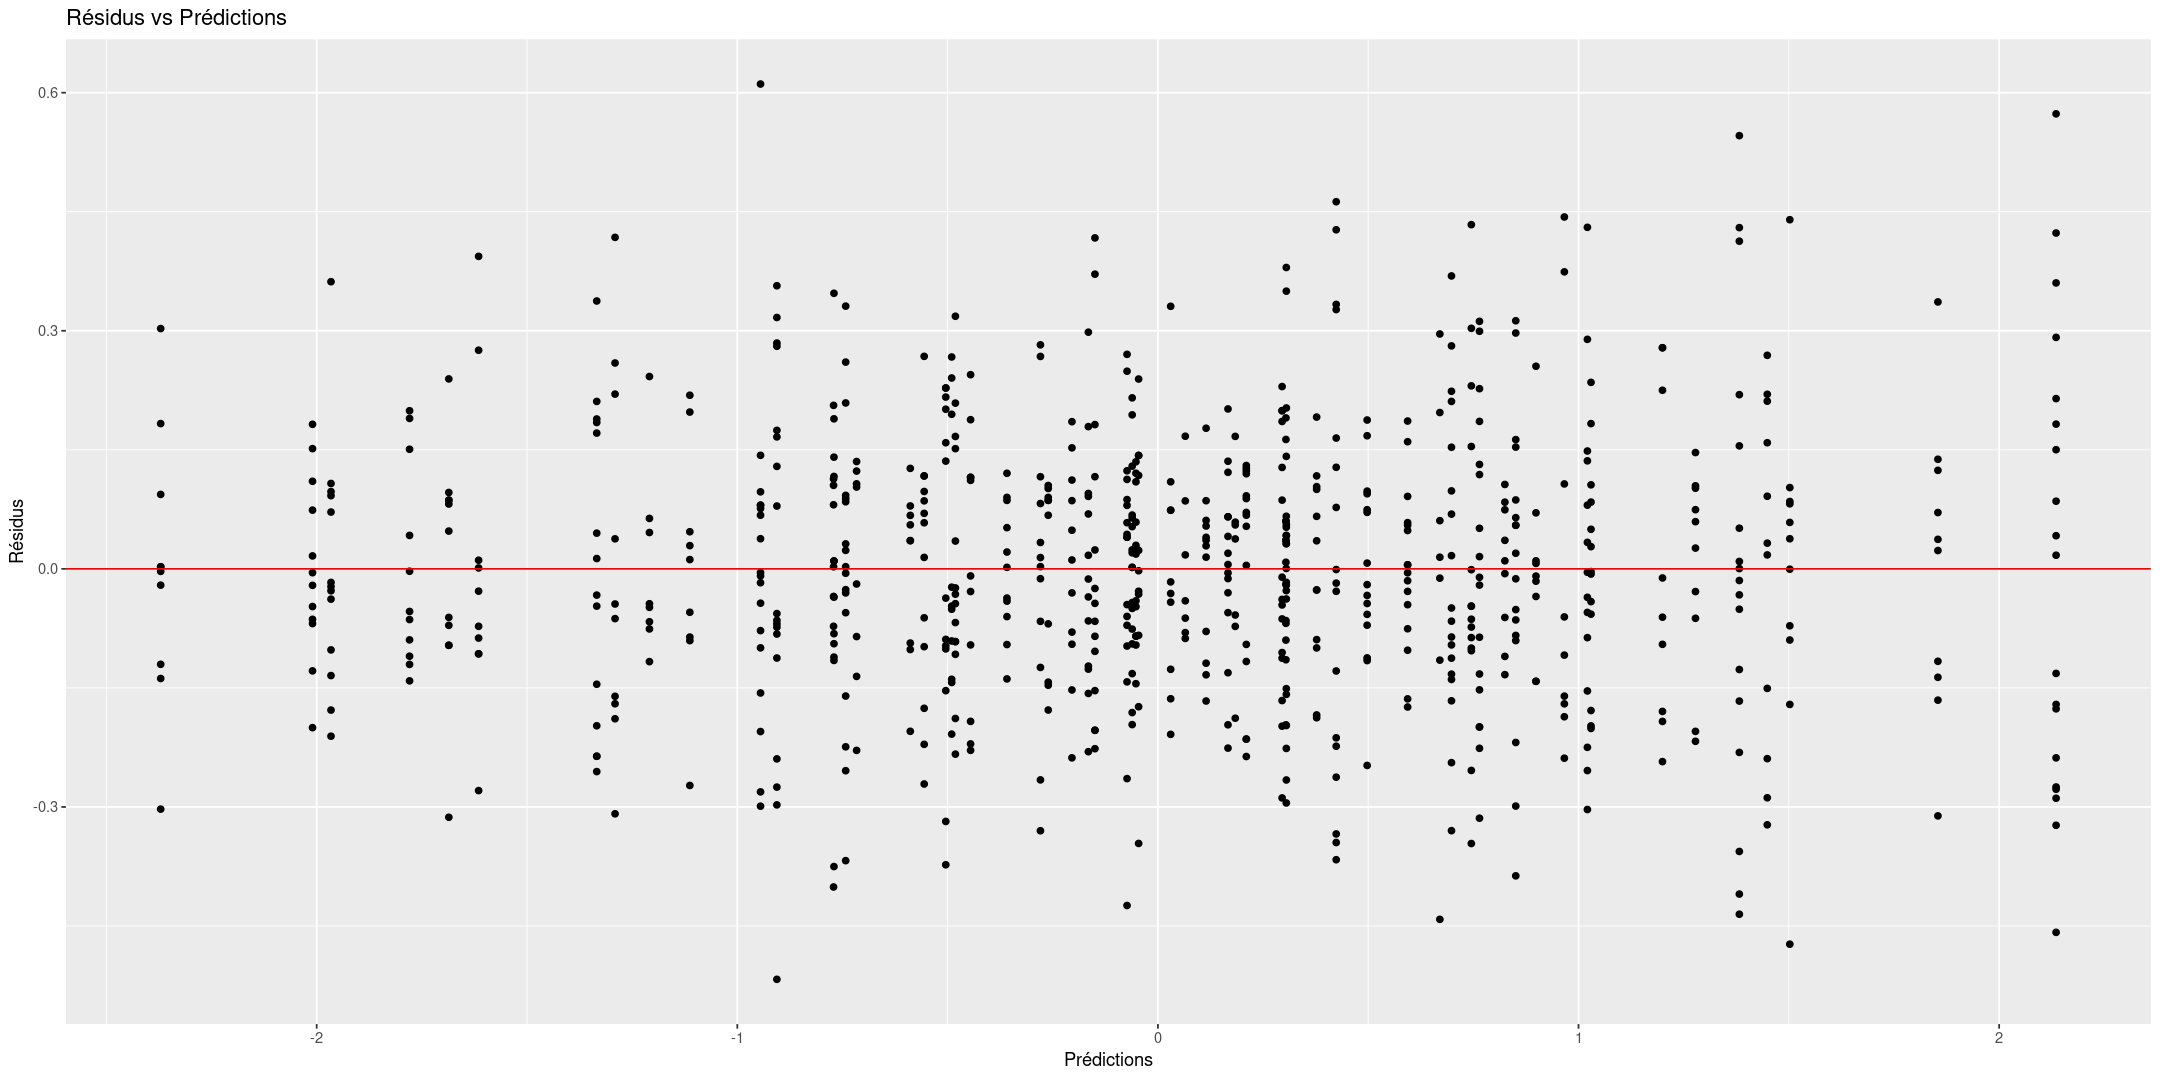

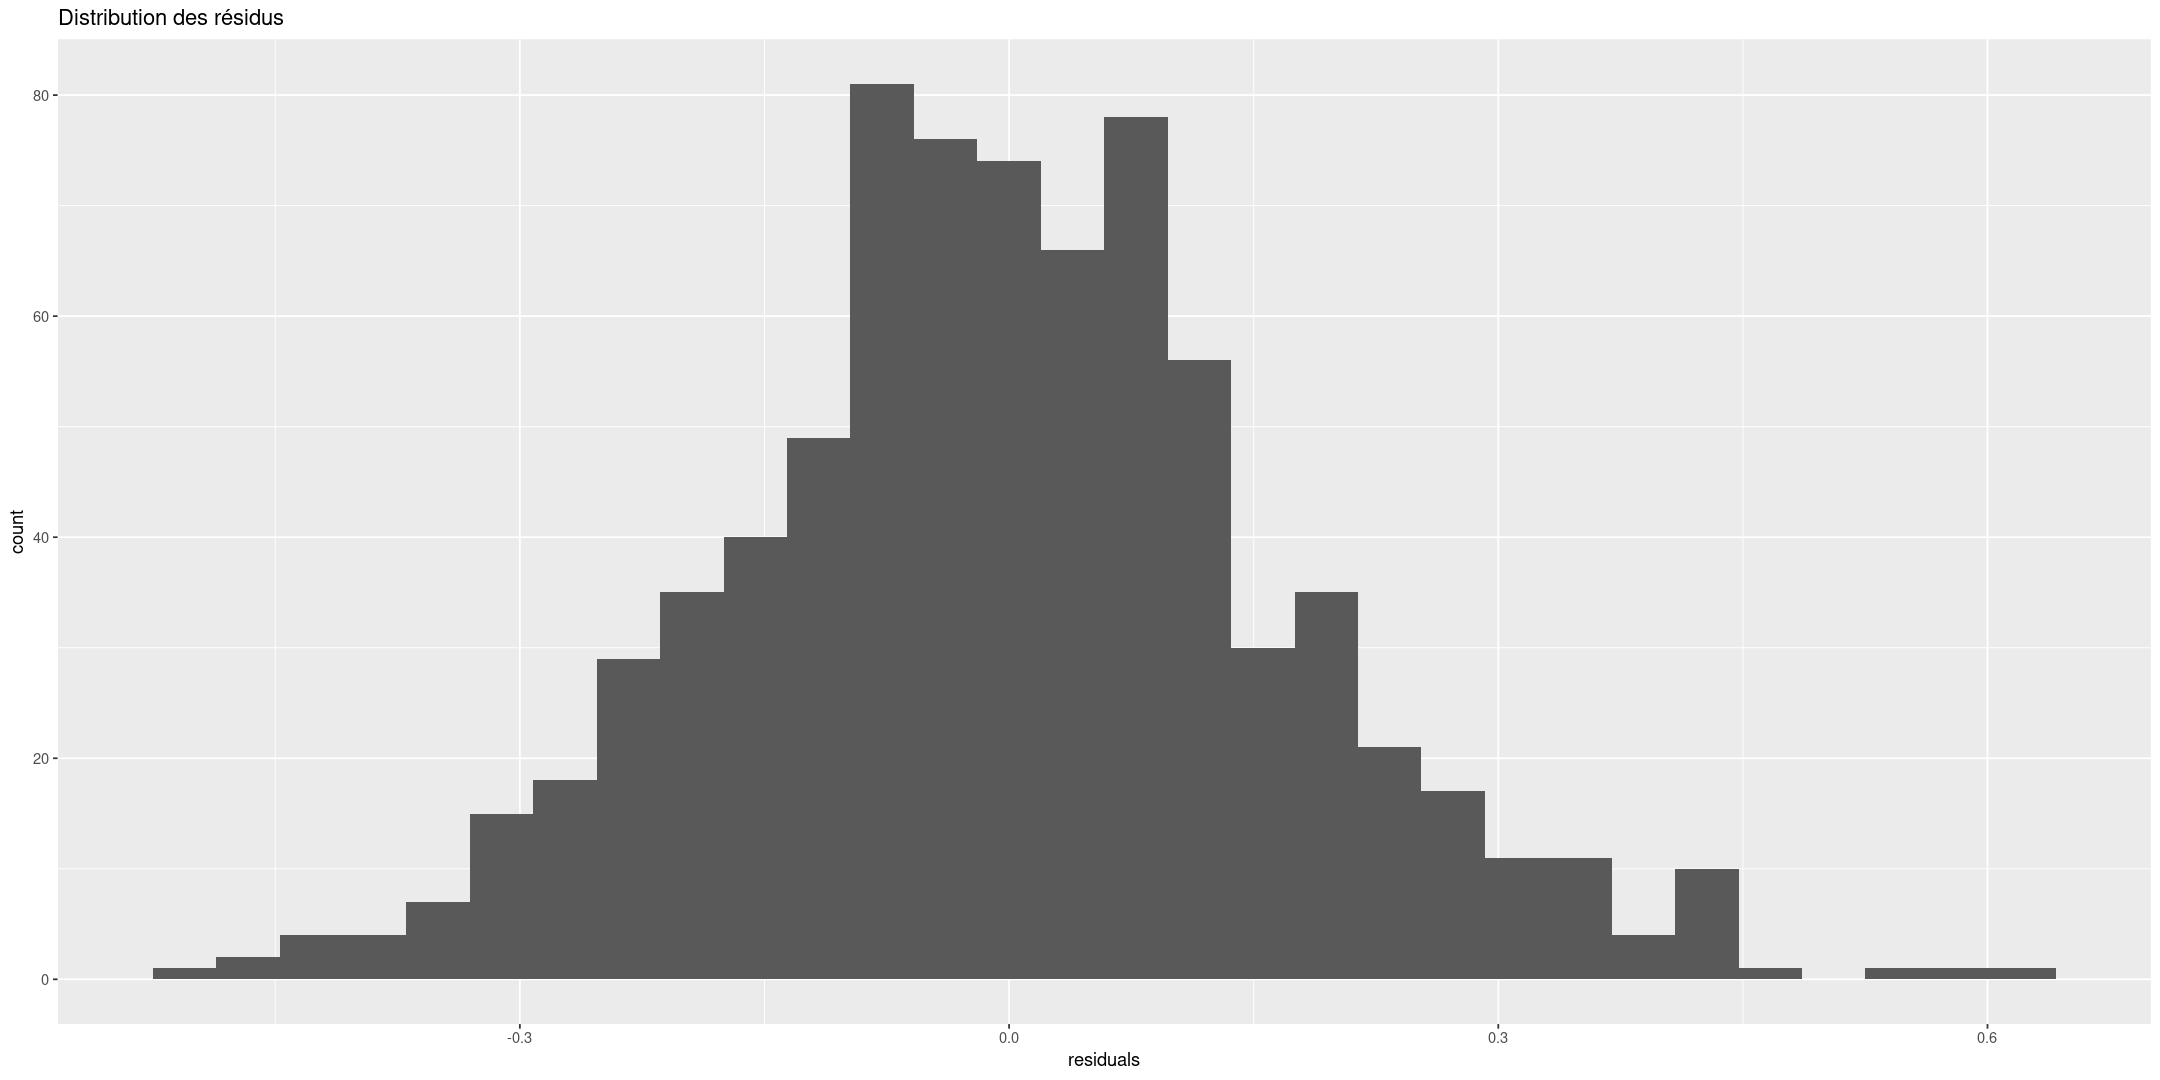

In [68]:
# Calculer les résidus
residuals <- residuals(tree.reg_no_i)

# Visualiser avec ggplot2
library(ggplot2)
ggplot(data = train, aes(x = predict(tree.reg_no_i), y = residuals)) + 
  geom_point() + 
  geom_hline(yintercept = 0, color = "red") + 
  labs(title = "Résidus vs Prédictions", x = "Prédictions", y = "Résidus")

# Histogramme des résidus
ggplot(data = train, aes(x = residuals)) + 
  geom_histogram(bins = 30) + 
  labs(title = "Distribution des résidus")

# <FONT COLOR="Orange">2. Prédiction des niveaux d’expériences</font>

## <FONT COLOR="Blue">2.1. Régression linéaire</font>

In [ ]:
a = data.frame(a = c(0.1,0.2,0.3), b = c(TRUE, TRUE, FALSE), c= c("a","b","c"))

In [ ]:
model.matrix(a~.-1, data = a)

In [ ]:
loss_mse_calo()